# Business Use Case: Enhancing User Engagement and Retention through Personalized Recipe Recommendations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import os

In [ ]:
## STEP 1 - Get all the top level links from dinner section alone

import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for the "Dinners" page
url = "https://www.allrecipes.com/recipes/17562/dinner/"

# Step 1: Fetch the "Dinner" category page content
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Step 2: Locate the parent <ul> element
ul = soup.find('ul', id='mntl-taxonomy-nodes__list_1-0')

# Step 3: Find all <li> elements within the <ul>
links = []
if ul:
    li_items = ul.find_all('li')  # Find all <li> elements
    for li in li_items:
        a_tag = li.find('a')  # Locate the <a> tag inside the <li>
        if a_tag:
            text = a_tag.get_text(strip=True)  # Extract the category name
            href = a_tag['href']  # Extract the link
            links.append((text, href))  # Store the name and link as a tuple




In [ ]:
def extract_recipe_details(recipe_url):
    response = requests.get(recipe_url)
    soup = BeautifulSoup(response.content, "html.parser")

    # Initialize variables to store recipe details
    prep_time, cook_time, total_time, servings = "N/A", "N/A", "N/A", "N/A"
    ingredients = []  # Initialize ingredients as an empty list

    # Extract all recipe detail items
    recipe_details = soup.find_all("div", class_="mm-recipes-details__item")

    for detail in recipe_details:
        label = detail.find("div", class_="mm-recipes-details__label").get_text(strip=True)
        value = detail.find("div", class_="mm-recipes-details__value").get_text(strip=True)

        if "Prep Time" in label:
            prep_time = value
        elif "Cook Time" in label:
            cook_time = value
        elif "Total Time" in label:
            total_time = value
        elif "Servings" in label:
            servings = value

    # Extracting the recipe name
    try:
        recipe_name = soup.find("h1", class_="article-heading text-headline-400").get_text(strip=True)
    except AttributeError:
        recipe_name = "N/A"

    # Extracting the ingredients
    try:
        ingredient_items = soup.find_all("li", class_="mm-recipes-structured-ingredients__list-item")
        for item in ingredient_items:
            # Extract quantity, unit, and name
            quantity = item.find("span", {"data-ingredient-quantity": "true"}).get_text(strip=True) if item.find("span", {"data-ingredient-quantity": "true"}) else ""
            unit = item.find("span", {"data-ingredient-unit": "true"}).get_text(strip=True) if item.find("span", {"data-ingredient-unit": "true"}) else ""
            name = item.find("span", {"data-ingredient-name": "true"}).get_text(strip=True) if item.find("span", {"data-ingredient-name": "true"}) else ""

            # Combine quantity, unit, and name into a single string
            ingredient = f"{quantity} {unit} {name}".strip()
            ingredients.append(ingredient)
    except AttributeError:
        ingredients = []  # If ingredients are not found

    return prep_time, cook_time, total_time, servings, recipe_name, ingredients # Step 4: Iterate through the recipe links and extract data


In [ ]:
data = []
for section_name, section_url in links:
    print(f"Scraping section: {section_name} - {section_url}")

    # Fetch the section page
    section_response = requests.get(section_url)
    section_soup = BeautifulSoup(section_response.content, "html.parser")

    # Locate recipe links in the section page
    recipe_cards = section_soup.find_all('a', href=True, class_="mntl-card-list-items")
    for card in recipe_cards:
        recipe_url = card['href']
        # Clean recipe URL
        if '/recipe/' in recipe_url:
            recipe_url = recipe_url.split('?')[0].split('#')[0]  # Remove query params or fragments
            print(f"Scraping recipe: {recipe_url}")
            prep_time, cook_time, total_time, servings, recipe_name, ingredients = extract_recipe_details(recipe_url)
            data.append({
                "Category": "Dinner",
                "Recipe Name": recipe_name,
                "Prep Time": prep_time,
                "Cook Time": cook_time,
                "Total Time": total_time,
                "Servings": servings,
                "Ingredients": ingredients  # Add the list of ingredients
            })
            print(f"Details extracted: {recipe_name}, {prep_time}, {cook_time}, {total_time}, {servings}, Ingredients: {len(ingredients)}")


Scraping section: Quick and Easy Dinners for One - https://www.allrecipes.com/recipes/15054/everyday-cooking/cooking-for-one/quick-and-easy/
Scraping recipe: https://www.allrecipes.com/recipe/23891/grilled-cheese-sandwich/
Details extracted: Grilled Cheese Sandwich, 5 mins, 10 mins, 15 mins, 2, Ingredients: 3
Scraping recipe: https://www.allrecipes.com/recipe/160099/seared-ahi-tuna-steaks/
Details extracted: Seared Ahi Tuna Steaks, 5 mins, 2 mins, 7 mins, 2, Ingredients: 6
Scraping recipe: https://www.allrecipes.com/recipe/21306/fish-in-foil/
Details extracted: Fish in Foil, 10 mins, 15 mins, 25 mins, 2, Ingredients: 7
Scraping recipe: https://www.allrecipes.com/recipe/236432/brown-sugar-ham-steak/
Details extracted: Brown Sugar Ham Steak, 5 mins, 20 mins, 25 mins, 2, Ingredients: 3
Scraping recipe: https://www.allrecipes.com/recipe/230818/pork-fried-rice/
Details extracted: Pork Fried Rice, 10 mins, 15 mins, 25 mins, 2, Ingredients: 11
Scraping recipe: https://www.allrecipes.com/recip

In [ ]:
# Step 5: Store the data in a DataFrame
df = pd.DataFrame(data)

df.head()

,Category,Recipe Name,Prep Time,Cook Time,Total Time,Servings,Ingredients
0,Dinner,Grilled Cheese Sandwich,5 mins,10 mins,15 mins,2,"[4 slices white bread, 3 tablespoons butter, d..."
1,Dinner,Seared Ahi Tuna Steaks,5 mins,2 mins,7 mins,2,"[2 (5 ounce) ahi tuna steaks, 1 teaspoon koshe..."
2,Dinner,Fish in Foil,10 mins,15 mins,25 mins,2,"[2 rainbow trout fillets, 1 tablespoon olive ..."
3,Dinner,Brown Sugar Ham Steak,5 mins,20 mins,25 mins,2,"[1 (8 ounce) bone-in fully cooked ham steak, 5..."
4,Dinner,Pork Fried Rice,10 mins,15 mins,25 mins,2,"[1 tablespoon butter, 1 (6 ounce) boneless por..."


In [ ]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.3/486.3 kB 29.6 MB/s eta 0:00:00


In [ ]:
!unzip /usr/bin/chrome-linux64.zip -d /usr/bin


Archive:  /usr/bin/chrome-linux64.zip
  inflating: /usr/bin/chrome-linux64/ABOUT  
  inflating: /usr/bin/chrome-linux64/MEIPreload/manifest.json  
  inflating: /usr/bin/chrome-linux64/MEIPreload/preloaded_data.pb  
  inflating: /usr/bin/chrome-linux64/PrivacySandboxAttestationsPreloaded/manifest.json  
  inflating: /usr/bin/chrome-linux64/PrivacySandboxAttestationsPreloaded/privacy-sandbox-attestations.dat  
  inflating: /usr/bin/chrome-linux64/WidevineCdm/LICENSE  
  inflating: /usr/bin/chrome-linux64/WidevineCdm/_platform_specific/linux_x64/libwidevinecdm.so  
  inflating: /usr/bin/chrome-linux64/WidevineCdm/manifest.json  
  inflating: /usr/bin/chrome-linux64/chrome  
  inflating: /usr/bin/chrome-linux64/chrome-wrapper  
  inflating: /usr/bin/chrome-linux64/chrome_100_percent.pak  
  inflating: /usr/bin/chrome-linux64/chrome_200_percent.pak  
  inflating: /usr/bin/chrome-linux64/chrome_crashpad_handler  
  inflating: /usr/bin/chrome-linux64/chrome_sandbox  
  inflating: /usr/bin/chr

In [ ]:
import os

os.getcwd()

'/content'

In [ ]:
!pip install webdriver-manager

In [ ]:
import os
import subprocess
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup
import time
from webdriver_manager.chrome import ChromeDriverManager  # Import ChromeDriverManager
import re

# Set up Chrome options
chrome_options = Options()
chrome_options.add_argument('--headless')  # Run in headless mode (no GUI)
chrome_options.add_argument('--no-sandbox')  # Disable sandbox for compatibility
chrome_options.add_argument('--disable-dev-shm-usage')  # Overcome limited resources issues
chrome_options.binary_location = "/usr/bin/chrome-linux64/chrome"
driver_path = "/chromedriver"  # Path to Chrome binary (adjust if needed)

# Set up the driver service
service = Service(driver_path)  # Path to ChromeDriver

# Create WebDriver instance with Chrome options
driver = webdriver.Chrome(service=service, options=chrome_options)

# Step 3: Function to extract recipe details
def extract_recipe_details(recipe_url):
    driver.get(recipe_url)  # Open the recipe URL in the browser

    # Wait for the page to load
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.CLASS_NAME, "mm-recipes-details__item"))
    )

    # Initialize variables to store recipe details
    prep_time, cook_time, total_time, servings = "N/A", "N/A", "N/A", "N/A"
    ingredients = []  # Initialize ingredients as an empty list
    calories, total_fat, cholesterol, protein = "N/A", "N/A", "N/A", "N/A"  # Initialize nutrition details manually

    # Extract page source after loading
    soup = BeautifulSoup(driver.page_source, "html.parser")

    # Extract all recipe detail items
    recipe_details = soup.find_all("div", class_="mm-recipes-details__item")

    for detail in recipe_details:
        label = detail.find("div", class_="mm-recipes-details__label").get_text(strip=True)
        value = detail.find("div", class_="mm-recipes-details__value").get_text(strip=True)

        if "Prep Time" in label:
            prep_time = value
        elif "Cook Time" in label:
            cook_time = value
        elif "Total Time" in label:
            total_time = value
        elif "Servings" in label:
            servings = value

    # Extracting the recipe name
    try:
        recipe_name = soup.find("h1", class_="article-heading text-headline-400").get_text(strip=True)
    except AttributeError:
        recipe_name = "N/A"

    # Extracting the ingredients
    try:
        ingredient_items = soup.find_all("li", class_="mm-recipes-structured-ingredients__list-item")
        for item in ingredient_items:
            # Extract quantity, unit, and name
            quantity = item.find("span", {"data-ingredient-quantity": "true"}).get_text(strip=True) if item.find(
                "span", {"data-ingredient-quantity": "true"}) else ""
            unit = item.find("span", {"data-ingredient-unit": "true"}).get_text(strip=True) if item.find(
                "span", {"data-ingredient-unit": "true"}) else ""
            name = item.find("span", {"data-ingredient-name": "true"}).get_text(strip=True) if item.find(
                "span", {"data-ingredient-name": "true"}) else ""

            # Combine quantity, unit, and name into a single string
            ingredient = f"{quantity} {unit} {name}".strip()
            ingredients.append(ingredient)
    except AttributeError:
        ingredients = []  # If ingredients are not found

    # Helper function to clean nutrition values
    def clean_nutrition_value(value_text):
        if 'mg' in value_text.lower():
            number = re.search(r'(\d+)', value_text)
            return f"{number.group(1)}mg" if number else "N/A"
        elif 'g' in value_text.lower():
            number = re.search(r'(\d+\.?\d*)', value_text)
            return f"{number.group(1)}g" if number else "N/A"
        else:
            number = re.search(r'(\d+\.?\d*)', value_text)
            return number.group(1) if number else "N/A"

    try:
        # Handle nutrition facts visibility
        try:
            show_nutrition_button = WebDriverWait(driver, 10).until(
                EC.element_to_be_clickable((By.XPATH, "//button[contains(text(), 'Hide Full Nutrition Label') or contains(text(), 'Show Full Nutrition Label')]"))
            )
            show_nutrition_button.click()
            time.sleep(2)
        except Exception as e:
            print(f"Note: Nutrition label might already be expanded: {e}")

        soup = BeautifulSoup(driver.page_source, "html.parser")
        nutrition_rows = soup.find_all("tr")

        # Initialize nutrition values
        calories = total_fat = saturated_fat = cholesterol = sodium = \
            total_carbohydrate = dietary_fiber = protein = potassium = "N/A"

        for row in nutrition_rows:
            text_content = row.get_text(strip=True)

            # Clean and extract values
            if "Calories" in text_content and not any(x in text_content.lower() for x in ["from", "daily"]):
                calories = clean_nutrition_value(text_content.split("Calories")[-1])
            elif "Total Fat" in text_content:
                total_fat = clean_nutrition_value(text_content.split("Total Fat")[-1])
            elif "Saturated Fat" in text_content:
                saturated_fat = clean_nutrition_value(text_content.split("Saturated Fat")[-1])
            elif "Cholesterol" in text_content:
                cholesterol = clean_nutrition_value(text_content.split("Cholesterol")[-1])
            elif "Sodium" in text_content:
                sodium = clean_nutrition_value(text_content.split("Sodium")[-1])
            elif "Total Carbohydrate" in text_content:
                total_carbohydrate = clean_nutrition_value(text_content.split("Total Carbohydrate")[-1])
            elif "Dietary Fiber" in text_content:
                dietary_fiber = clean_nutrition_value(text_content.split("Dietary Fiber")[-1])
            elif "Protein" in text_content:
                protein = clean_nutrition_value(text_content.split("Protein")[-1])
            elif "Potassium" in text_content:
                potassium = clean_nutrition_value(text_content.split("Potassium")[-1])

        # Debug print with cleaned values
        print(f"""
        Extracted nutrition values:
        Calories: {calories}
        Total Fat: {total_fat}
        Saturated Fat: {saturated_fat}
        Cholesterol: {cholesterol}
        Sodium: {sodium}
        Total Carbohydrate: {total_carbohydrate}
        Dietary Fiber: {dietary_fiber}
        Protein: {protein}
        Potassium: {potassium}
        """)
    except Exception as e:
        print(f"Error extracting nutrition facts: {e}")

    return (
        prep_time, cook_time, total_time, servings, recipe_name, ingredients,
        calories, total_fat, saturated_fat, cholesterol, sodium,
        total_carbohydrate, dietary_fiber, protein, potassium
    )


In [147]:
data = []

for section_name, section_url in links:
    print(f"Scraping section: {section_name} - {section_url}")

    try:
        # Fetch the section page
        section_response = requests.get(section_url)
        section_soup = BeautifulSoup(section_response.content, "html.parser")

        # Locate recipe links in the section page
        recipe_cards = section_soup.find_all('a', href=True, class_="mntl-card-list-items")

        for card in recipe_cards:
            try:
                recipe_url = card['href']
                # Clean recipe URL
                if '/recipe/' in recipe_url:
                    recipe_url = recipe_url.split('?')[0].split('#')[0]  # Remove query params or fragments
                    print(f"Scraping recipe: {recipe_url}")

                    # Extract all recipe details using the updated function
                    (prep_time, cook_time, total_time, servings, recipe_name, ingredients,
                     calories, total_fat, saturated_fat, cholesterol, sodium,
                     total_carbohydrate, dietary_fiber, protein, potassium) = extract_recipe_details(recipe_url)

                    # Create dictionary with all extracted information
                    recipe_data = {
                        "Category": section_name,
                        "Recipe Name": recipe_name,
                        "Prep Time": prep_time,
                        "Cook Time": cook_time,
                        "Total Time": total_time,
                        "Servings": servings,
                        "Ingredients": ingredients,
                        "Calories": calories,
                        "Total Fat": total_fat,
                        "Saturated Fat": saturated_fat,
                        "Cholesterol": cholesterol,
                        "Sodium": sodium,
                        "Total Carbohydrate": total_carbohydrate,
                        "Dietary Fiber": dietary_fiber,
                        "Protein": protein,
                        "Potassium": potassium
                    }

                    data.append(recipe_data)

                    print(f"Details extracted for {recipe_name}:")
                    print(f"Times: Prep={prep_time}, Cook={cook_time}, Total={total_time}")
                    print(f"Servings: {servings}")
                    print(f"Ingredients count: {len(ingredients)}")
                    print(f"Nutrition: Cal={calories}, Fat={total_fat}, Chol={cholesterol}, Prot={protein}")
                    print("-" * 50)

                    # Optional: Add a small delay between requests to be polite to the server
                    time.sleep(2)

            except Exception as e:
                print(f"Error processing recipe {recipe_url}: {str(e)}")
                continue

    except Exception as e:
        print(f"Error processing section {section_name}: {str(e)}")
        continue

# Quit the Selenium driver after all recipes are scraped
driver.quit()





NameError: name 'links' is not defined

In [148]:
data = pd.DataFrame(data)

In [150]:
data.head()

""


In [146]:
data.shape

(100000, 14)

In [143]:
# Convert the DataFrame to a CSV file for download
csv_file_path = "/Recepies.csv"
data.to_csv(csv_file_path, index=False)

AttributeError: 'list' object has no attribute 'to_csv'

In [ ]:
!chmod +x /chromedriver

In [ ]:
!pip install --upgrade selenium


In [ ]:
## USERS DATA

In [812]:
!pip install faker

In [908]:
import pandas as pd
from faker import Faker
import random
import numpy as np

# Initialize Faker
fake = Faker()

# Define dietary restrictions, preferences, allergies, and other attributes
dietary_choices = ['Vegan', 'Keto', 'Gluten-Free', 'Vegetarian', 'None']
dietary_prob = [0.05, 0.15, 0.1, 0.2, 0.5]  # Most users have no restriction

food_likes = ['Spicy', 'Sweet', 'Savory', 'Sour', 'Neutral']
food_prob = [0.3, 0.15, 0.25, 0.1, 0.2]  # Spicy & Savory are more popular

health_goals = ['Weight Loss', 'Muscle Gain', 'Maintenance', 'Boost Immunity']
health_goal_prob = [0.4, 0.2, 0.25, 0.15]  # Weight loss is the most common goal

time_availability_options = ['Under 25 mins', '25-40 mins', '40-80 mins', 'Over 80 mins']
time_prob = [0.35, 0.4, 0.2, 0.05]  # Most users prefer quick meals

# Generate synthetic data
num_users = 100000
data = []

for _ in range(num_users):
    age = random.randint(18, 70)  # Randomized age
    height = random.randint(150, 200)  # Height in cm
    weight = random.randint(50, 120)  # Weight in kg
    bmi = round(weight / (height / 100) ** 2, 2)

    # Assigning user attributes
    dietary_restriction = np.random.choice(dietary_choices, p=dietary_prob)
    food_preference = np.random.choice(food_likes, p=food_prob)
    time_availability = np.random.choice(time_availability_options, p=time_prob)
    health_goal = np.random.choice(health_goals, p=health_goal_prob)

    # 🎯 First-Session Engagement Metrics
    clicks_on_recipes = random.randint(0, 10)  # How many recipes they clicked
    saved_recipes_count = random.randint(0, 5)  # Recipes saved
    recipes_rated_count = random.randint(0, saved_recipes_count)  # Recipes rated
    avg_session_duration = round(random.uniform(3, 15), 2)  # Average session duration in minutes

    # Determine First-Session Engagement Level
    if clicks_on_recipes == 0:
        engagement_level = "No Interaction"
    elif clicks_on_recipes <= 2:
        engagement_level = "Low Engagement"
    elif clicks_on_recipes <= 5:
        engagement_level = "Medium Engagement"
    else:
        engagement_level = "High Engagement"

    # Store user data
    data.append({
        'User_ID': fake.uuid4(),
        'Name': fake.name(),
        'Age': age,
        'Gender': random.choices(['Male', 'Female', 'Others'], weights=[0.48, 0.48, 0.04])[0],
        'Height': height,
        'Weight': weight,
        'BMI': bmi,
        'Dietary_Restrictions': dietary_restriction,
        'Food_Preference': food_preference,
        'Time_Availability': time_availability,
        'Health_Goal': health_goal,
        'Clicks_on_Recipes': clicks_on_recipes,
        'Saved_Recipes_Count': saved_recipes_count,
        'Recipes_Rated_Count': recipes_rated_count,
        'Avg_Session_Duration': avg_session_duration,
        'First_Session_Engagement_Level': engagement_level
    })

# Create DataFrame
user_data = pd.DataFrame(data)

user_data.head()



,User_ID,Name,Age,Gender,Height,Weight,BMI,Dietary_Restrictions,Food_Preference,Time_Availability,Health_Goal,Clicks_on_Recipes,Saved_Recipes_Count,Recipes_Rated_Count,Avg_Session_Duration,First_Session_Engagement_Level
0,a97ee1f7-ef94-46aa-ba87-05a18a88a487,Christine Sandoval,47,Female,179,100,31.21,Vegetarian,Spicy,25-40 mins,Weight Loss,7,5,1,6.06,High Engagement
1,c1099a72-7b90-4aa8-934a-2743c63493d3,Timothy Nelson,19,Female,187,114,32.60,None,Neutral,Under 25 mins,Muscle Gain,7,3,2,13.22,High Engagement
2,78138d4a-236b-48dd-a14e-d5fc66fbf4f7,Kathryn Mitchell,39,Others,195,65,17.09,None,Savory,Over 80 mins,Boost Immunity,7,1,1,12.31,High Engagement
3,32ced758-bc8c-4819-9dfd-c5bbce82f86f,Robert Williamson,33,Male,154,55,23.19,None,Savory,40-80 mins,Boost Immunity,5,4,1,4.49,Medium Engagement
4,0faf4702-1dea-4b15-9f89-7e91e66c4299,Tammie Leach,68,Female,193,58,15.57,Vegetarian,Neutral,25-40 mins,Maintenance,5,4,0,4.36,Medium Engagement


In [909]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   User_ID                         100000 non-null  object 
 1   Name                            100000 non-null  object 
 2   Age                             100000 non-null  int64  
 3   Gender                          100000 non-null  object 
 4   Height                          100000 non-null  int64  
 5   Weight                          100000 non-null  int64  
 6   BMI                             100000 non-null  float64
 7   Dietary_Restrictions            100000 non-null  object 
 8   Food_Preference                 100000 non-null  object 
 9   Time_Availability               100000 non-null  object 
 10  Health_Goal                     100000 non-null  object 
 11  Clicks_on_Recipes               100000 non-null  int64  
 12  Saved_Recipes_Cou

In [815]:
user_data.head()

,User_ID,Name,Age,Gender,Height,Weight,BMI,Dietary_Restrictions,Food_Preference,Allergies,Time_Availability,Health_Goal,Preferred_Nutrients,Medical_Conditions
0,4667e60c-d2d3-4a92-8b6a-e1d1eec61466,Kelly Brock,64,Male,171,90,30.78,Gluten-Free,Spicy,Peanuts,25-40 mins,Maintenance,Low Carb,None
1,a4839b78-cac1-4f87-8492-37b6acc6d983,Mr. George Tucker,28,Female,166,79,28.67,None,Savory,"Gluten, Dairy",25-40 mins,Maintenance,High Fiber,High Cholesterol
2,6d29df49-8a21-4e42-a533-9e9fb16065ad,Diana Rodriguez,40,Male,163,81,30.49,Gluten-Free,Sweet,None,Under 25 mins,Boost Immunity,High Protein,None
3,105ac842-5112-4a4f-a819-c446ffaab4bd,Holly Mason,30,Female,175,96,31.35,None,Neutral,None,Under 25 mins,Muscle Gain,Low Carb,High Cholesterol
4,f7a56271-afa6-4891-a5eb-3ec6c836943a,Francis Castaneda,19,Female,195,57,14.99,Gluten-Free,Spicy,None,Under 25 mins,Maintenance,Balanced,Diabetes


# **EXPLORATORY DATA ANALYSIS**

In [816]:
df = pd.read_csv("/content/Recepies.csv")
df.head()

,Category,Recipe Name,Prep Time,Cook Time,Total Time,Servings,Ingredients,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Protein,Potassium
0,Quick and Easy Dinners for One,Grilled Cheese Sandwich,5 mins,10 mins,15 mins,2,"['4 slices white bread', '3 tablespoons butter...",400.0,28g,17g,76mg,639mg,26g,1g,11g,83mg
1,Quick and Easy Dinners for One,Seared Ahi Tuna Steaks,5 mins,2 mins,7 mins,2,"['2 (5 ounce) ahi tuna steaks', '1 teaspoon ko...",301.0,18g,4g,71mg,1034mg,1g,0g,33g,645mg
2,Quick and Easy Dinners for One,Fish in Foil,10 mins,15 mins,25 mins,2,"['2 rainbow trout fillets', '1 tablespoon oli...",213.0,11g,2g,67mg,1850mg,8g,3g,24g,663mg
3,Quick and Easy Dinners for One,Brown Sugar Ham Steak,5 mins,20 mins,25 mins,2,"['1 (8 ounce) bone-in fully cooked ham steak',...",521.0,34g,20g,127mg,1648mg,33g,NaN,22g,421mg
4,Quick and Easy Dinners for One,Pork Fried Rice,10 mins,15 mins,25 mins,2,"['1 tablespoon butter', '1 (6 ounce) boneless ...",557.0,13g,6g,137mg,815mg,81g,3g,26g,495mg


#  NULL VALUE IMPUTATIONS AND EDITS

In [817]:
## STEP 1 : Analyse the null values Present and make meaningful changes and impute them (Null Value Imputation)

In [818]:
## Do a df.info() to understand the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Category            596 non-null    object 
 1   Recipe Name         596 non-null    object 
 2   Prep Time           592 non-null    object 
 3   Cook Time           570 non-null    object 
 4   Total Time          595 non-null    object 
 5   Servings            596 non-null    int64  
 6   Ingredients         596 non-null    object 
 7   Calories            591 non-null    float64
 8   Total Fat           591 non-null    object 
 9   Saturated Fat       590 non-null    object 
 10  Cholesterol         553 non-null    object 
 11  Sodium              591 non-null    object 
 12  Total Carbohydrate  587 non-null    object 
 13  Dietary Fiber       569 non-null    object 
 14  Protein             591 non-null    object 
 15  Potassium           591 non-null    object 
dtypes: float

In [819]:
int(df['Cook Time'][df['Cook Time']=='1 hr 30 mins'].head(1).values[0].split('hr')[0].strip())*60

60

In [820]:
time_list = ['Prep Time','Cook Time','Total Time']

for col in time_list:
    df[col] = df[col].fillna('0 min').astype(str)

In [821]:
df['Prep Time'].value_counts()

,count
Prep Time,
10 mins,186
15 mins,152
20 mins,100
5 mins,86
30 mins,36
25 mins,17
35 mins,5
40 mins,5
0 min,4


In [822]:
## So in the time column we can have data like 1 min, 2 hrs, 2 hr or 1 hr 30 mins. So the step would vbe to first ensure all the data is numeric and it isin minutes:


time_list = ['Prep Time', 'Cook Time', 'Total Time']

for i in time_list:
    for time in df[i]:

        # Case 1: If the string contains 'day' and 'hr'
        if 'day' in time and 'hrs' in time:
            days = int(time.split('day')[0].strip()) * 1440  # Convert days to minutes
            hours = int(time.split('day')[1].split('hrs')[0].strip()) * 60  # Convert hours to minutes
            time_in_minutes = days + hours

            df[i] = df[i].replace(time, time_in_minutes)


         # Case 1: If the string contains 'day' and 'hr'
        elif 'day' in time and 'hr' in time:
            days = int(time.split('day')[0].strip()) * 1440  # Convert days to minutes
            hours = int(time.split('day')[1].split('hr')[0].strip()) * 60  # Convert hours to minutes
            time_in_minutes = days + hours

            df[i] = df[i].replace(time, time_in_minutes)

        # Case 2: If the string contains 'hr' and 'min'
        elif 'hrs' in time and 'mins' in time:
            hours = int(time.split('hrs')[0].strip()) * 60  # Extract hours and convert to minutes
            minutes = int(time.split('hrs')[1].split('mins')[0].strip())  # Extract minutes
            time_in_minutes = hours + minutes

            df[i] = df[i].replace(time, time_in_minutes)

        # Case 3: If the string contains only 'hr'
        elif 'hr' in time:
            hours = int(time.split('hr')[0].strip()) * 60  # Extract hours and convert to minutes
            time_in_minutes = hours

            df[i] = df[i].replace(time, time_in_minutes)

        # Case 4: If the string contains only 'min'
        elif 'min' in time:
            minutes = int(time.split('min')[0].strip())  # Extract minutes
            time_in_minutes = minutes

            df[i] = df[i].replace(time, time_in_minutes)

        # Case 5: If the string contains 'hrs'
        elif 'hrs' in time:
            hours = int(time.split('hrs')[0].strip()) * 60  # Extract hours and convert to minutes
            time_in_minutes = hours

            df[i] = df[i].replace(time, time_in_minutes)

        # Case 6: If the string contains 'mins'
        elif 'mins' in time:
            minutes = int(time.split('mins')[0].strip())  # Extract minutes
            time_in_minutes = minutes

            df[i] = df[i].replace(time, time_in_minutes)

        else:

          pass





<ipython-input-822-cc3022d341b3>:46: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-822-cc3022d341b3>:32: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [823]:
## Check if the time columns look good now and impute all the 0 minute value to median of the values:


df['Prep Time'] = df.groupby('Category')['Prep Time'].transform(lambda x: x.replace('0 min', x.median()))
df['Cook Time'] = df.groupby('Category')['Cook Time'].transform(lambda x: x.replace('0 min', x.median ()))
df['Total Time'] = df.groupby('Category')['Total Time'].transform(lambda x: x.replace('0 min', x.median()))


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Category            596 non-null    object 
 1   Recipe Name         596 non-null    object 
 2   Prep Time           596 non-null    int64  
 3   Cook Time           596 non-null    int64  
 4   Total Time          596 non-null    int64  
 5   Servings            596 non-null    int64  
 6   Ingredients         596 non-null    object 
 7   Calories            591 non-null    float64
 8   Total Fat           591 non-null    object 
 9   Saturated Fat       590 non-null    object 
 10  Cholesterol         553 non-null    object 
 11  Sodium              591 non-null    object 
 12  Total Carbohydrate  587 non-null    object 
 13  Dietary Fiber       569 non-null    object 
 14  Protein             591 non-null    object 
 15  Potassium           591 non-null    object 
dtypes: float

In [824]:
## Lets look into the other null values present int the data -

df[df['Calories'].isnull()]

,Category,Recipe Name,Prep Time,Cook Time,Total Time,Servings,Ingredients,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Protein,Potassium
220,Vegetarian Main Dishes,Gnocchi with Pomodoro Sauce,10,0,10,4,"['¼ cup olive oil', '2 (12 ounce) packages ref...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,Healthy Main Dishes,Marinated Pork Roast,15,60,225,8,"['½ cup Worcestershire sauce', '2 tablespoons ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,Pork Chops,Pan-Fried Pork Chops,5,10,15,4,"['4 boneless pork chops, 3/4-inch thick', 'sa...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
495,Main Dish Salads,Steak Fajita Salad,35,0,35,2,"['8 ounces beef steak, cut into thin strips', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
589,Baked and Roasted Chicken,One-Dish Chicken and Stuffing Bake,10,30,40,6,"['1 ¼ cups boiling water', '4 tablespoons butt...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [825]:
df.head(2)

,Category,Recipe Name,Prep Time,Cook Time,Total Time,Servings,Ingredients,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Protein,Potassium
0,Quick and Easy Dinners for One,Grilled Cheese Sandwich,5,10,15,2,"['4 slices white bread', '3 tablespoons butter...",400.0,28g,17g,76mg,639mg,26g,1g,11g,83mg
1,Quick and Easy Dinners for One,Seared Ahi Tuna Steaks,5,2,7,2,"['2 (5 ounce) ahi tuna steaks', '1 teaspoon ko...",301.0,18g,4g,71mg,1034mg,1g,0g,33g,645mg


In [826]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Category            596 non-null    object 
 1   Recipe Name         596 non-null    object 
 2   Prep Time           596 non-null    int64  
 3   Cook Time           596 non-null    int64  
 4   Total Time          596 non-null    int64  
 5   Servings            596 non-null    int64  
 6   Ingredients         596 non-null    object 
 7   Calories            591 non-null    float64
 8   Total Fat           591 non-null    object 
 9   Saturated Fat       590 non-null    object 
 10  Cholesterol         553 non-null    object 
 11  Sodium              591 non-null    object 
 12  Total Carbohydrate  587 non-null    object 
 13  Dietary Fiber       569 non-null    object 
 14  Protein             591 non-null    object 
 15  Potassium           591 non-null    object 
dtypes: float

In [827]:
time_list = ['Total Fat', 'Saturated Fat', 'Cholesterol','Sodium', 'Total Carbohydrate', 'Dietary Fiber', 'Protein', 'Potassium']

for col in time_list:

  df[col] = df[col].apply(lambda x:str(x).replace('g',''))
  df[col] = df[col].apply(lambda x:str(x).replace('mg',''))
  df[col] = df[col].apply(lambda x:str(x).replace('m',''))
  df[col] = df[col].astype(float)

df.head(2)

,Category,Recipe Name,Prep Time,Cook Time,Total Time,Servings,Ingredients,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Protein,Potassium
0,Quick and Easy Dinners for One,Grilled Cheese Sandwich,5,10,15,2,"['4 slices white bread', '3 tablespoons butter...",400.0,28.0,17.0,76.0,639.0,26.0,1.0,11.0,83.0
1,Quick and Easy Dinners for One,Seared Ahi Tuna Steaks,5,2,7,2,"['2 (5 ounce) ahi tuna steaks', '1 teaspoon ko...",301.0,18.0,4.0,71.0,1034.0,1.0,0.0,33.0,645.0


In [828]:
## Now the best way to go about : imputing Nutrional Content - Logically would be to impute values based on similar ingredients:

## STEP 1: Cleaning the data to bring it to  a atring format

import re

# Preprocessing function to clean ingredients
def preprocess_ingredients(ingredients):
    # Join the list into a single string if it's already split
    ingredients_str = ' '.join(ingredients) if isinstance(ingredients, list) else ingredients
    # Remove quantities and units using regex
    clean_ingredients = re.sub(r'\d+.*?\b', '', ingredients_str)  # Remove quantities (e.g., '2 cups', '5 ounces')
    clean_ingredients = re.sub(r'[^\w\s]', '', clean_ingredients)  # Remove special characters
    return clean_ingredients.strip().lower()  # Convert to lowercase and strip whitespace

# Apply preprocessing to the ingredients column
df['Cleaned_Ingredients'] = df['Ingredients'].apply(lambda x: preprocess_ingredients(x))


In [829]:
## STEP 2: Compute Similarity in matrix:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vectorize the cleaned ingredients
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['Cleaned_Ingredients'])

# Compute similarity between recipes
similarity_matrix = cosine_similarity(tfidf_matrix)


In [830]:
import numpy as np

# Function to impute missing values based on similar recipes
def impute_based_on_similarity(row, similarity_matrix, df, col):
    index = row.name  # Get the index of the current row
    similarity_scores = similarity_matrix[index]  # Similarity scores for the current recipe
    similar_indices = np.argsort(similarity_scores)[::-1][1:6]  # Top 5 most similar recipes (excluding itself)

    # Get non-null values of the column from similar recipes
    similar_values = df.iloc[similar_indices][col].dropna()

    if not similar_values.empty:
        return similar_values.mean()  # Return the mean of similar values
    else:
        return np.nan  # Return NaN if no similar values are available

# Apply the function to each column with missing values
critical_columns = ['Calories', 'Total Fat', 'Saturated Fat', 'Cholesterol','Sodium', 'Total Carbohydrate', 'Dietary Fiber', 'Protein', 'Potassium']

for col in critical_columns:
    df[col] = df.apply(lambda row: impute_based_on_similarity(row, similarity_matrix, df, col)
                       if pd.isnull(row[col]) else row[col], axis=1)


In [831]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Category             596 non-null    object 
 1   Recipe Name          596 non-null    object 
 2   Prep Time            596 non-null    int64  
 3   Cook Time            596 non-null    int64  
 4   Total Time           596 non-null    int64  
 5   Servings             596 non-null    int64  
 6   Ingredients          596 non-null    object 
 7   Calories             596 non-null    float64
 8   Total Fat            596 non-null    float64
 9   Saturated Fat        596 non-null    float64
 10  Cholesterol          596 non-null    float64
 11  Sodium               596 non-null    float64
 12  Total Carbohydrate   596 non-null    float64
 13  Dietary Fiber        596 non-null    float64
 14  Protein              596 non-null    float64
 15  Potassium            596 non-null    flo

In [832]:
## All the null values are imputed - Lets do a quick check of the same

In [833]:
df[df['Recipe Name'] == 'Gnocchi with Pomodoro Sauce']

,Category,Recipe Name,Prep Time,Cook Time,Total Time,Servings,Ingredients,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Total Carbohydrate,Dietary Fiber,Protein,Potassium,Cleaned_Ingredients
220,Vegetarian Main Dishes,Gnocchi with Pomodoro Sauce,10,0,10,4,"['¼ cup olive oil', '2 (12 ounce) packages ref...",534.4,32.4,14.4,176.6,668.2,39.2,2.4,22.8,409.0,¼ cup olive oil ounce packages refrigerated ...


In [834]:
df[(df['Calories']>=500) & (df['Calories']<=600)]['Category'].value_counts()

,count
Category,
Cooking for Two,12
Slow Cooker Main Dishes,9
Main Dish Salads,9
Meatloaf,7
Quick and Easy Dinners for One,6
Sheet Pan Dinners,5
Baked and Roasted Chicken,4
Vegetarian Main Dishes,3
Main Dishes,3


In [835]:
## Now Rename the columns for intuitive understanding :


# Rename columns and convert units
df.rename(columns={
    'Prep Time': 'Prep Time Mins',
    'Cook Time': 'Cook Time Mins',
    'Total Time': 'Total Time Mins',
    'Total Fat': 'Total Fat (g)',
    'Saturated Fat': 'Saturated Fat (g)',
    'Cholesterol': 'Cholesterol (mg)',
    'Sodium': 'Sodium (mg)',
    'Total Carbohydrate': 'Total Carbohydrate (g)',
    'Dietary Fiber': 'Dietary Fiber (g)',
    'Protein': 'Protein (g)',
    'Potassium': 'Potassium (mg)'
}, inplace=True)

# Convert mg columns to g (divide by 1000)
columns_to_convert = ['Cholesterol (mg)', 'Sodium (mg)', 'Potassium (mg)']
for col in columns_to_convert:
    df[col] = df[col].apply(lambda x: x / 1000 if not pd.isnull(x) else x)  # Convert to g

# Update the column names to reflect the conversion
df.rename(columns={
    'Cholesterol (mg)': 'Cholesterol (g)',
    'Sodium (mg)': 'Sodium (g)',
    'Potassium (mg)': 'Potassium (g)'
}, inplace=True)

# Check the updated DataFrame
df.head()


,Category,Recipe Name,Prep Time Mins,Cook Time Mins,Total Time Mins,Servings,Ingredients,Calories,Total Fat (g),Saturated Fat (g),Cholesterol (g),Sodium (g),Total Carbohydrate (g),Dietary Fiber (g),Protein (g),Potassium (g),Cleaned_Ingredients
0,Quick and Easy Dinners for One,Grilled Cheese Sandwich,5,10,15,2,"['4 slices white bread', '3 tablespoons butter...",400.0,28.0,17.0,0.076,0.639,26.0,1.000000,11.0,0.083,slices white bread tablespoons butter divided...
1,Quick and Easy Dinners for One,Seared Ahi Tuna Steaks,5,2,7,2,"['2 (5 ounce) ahi tuna steaks', '1 teaspoon ko...",301.0,18.0,4.0,0.071,1.034,1.0,0.000000,33.0,0.645,ounce ahi tuna steaks teaspoon kosher salt ¼ ...
2,Quick and Easy Dinners for One,Fish in Foil,10,15,25,2,"['2 rainbow trout fillets', '1 tablespoon oli...",213.0,11.0,2.0,0.067,1.850,8.0,3.000000,24.0,0.663,rainbow trout fillets tablespoon olive oil t...
3,Quick and Easy Dinners for One,Brown Sugar Ham Steak,5,20,25,2,"['1 (8 ounce) bone-in fully cooked ham steak',...",521.0,34.0,20.0,0.127,1.648,33.0,2.333333,22.0,0.421,ounce bonein fully cooked ham steak tablespoo...
4,Quick and Easy Dinners for One,Pork Fried Rice,10,15,25,2,"['1 tablespoon butter', '1 (6 ounce) boneless ...",557.0,13.0,6.0,0.137,0.815,81.0,3.000000,26.0,0.495,tablespoon butter ounce boneless pork loin c...


In [836]:
## Null value imputation, along with resetting of all columns are done

# **DATA VISUALIZATIONS**

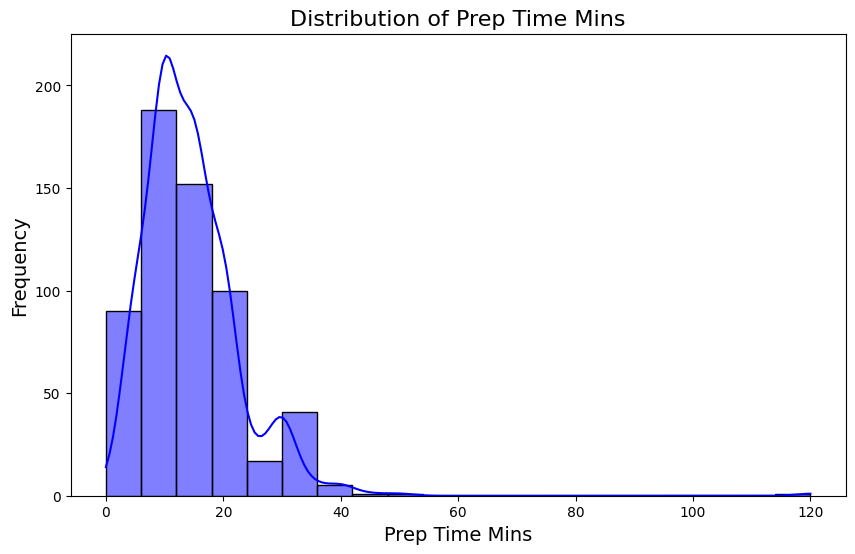

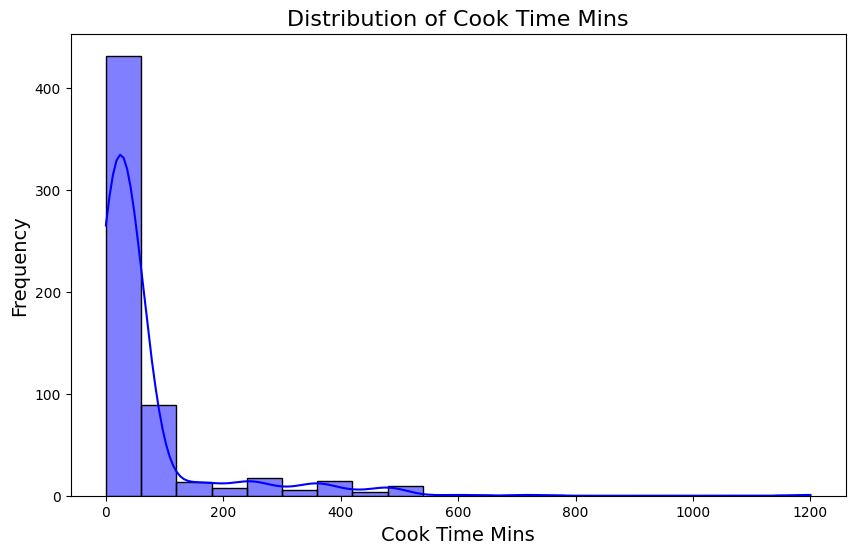

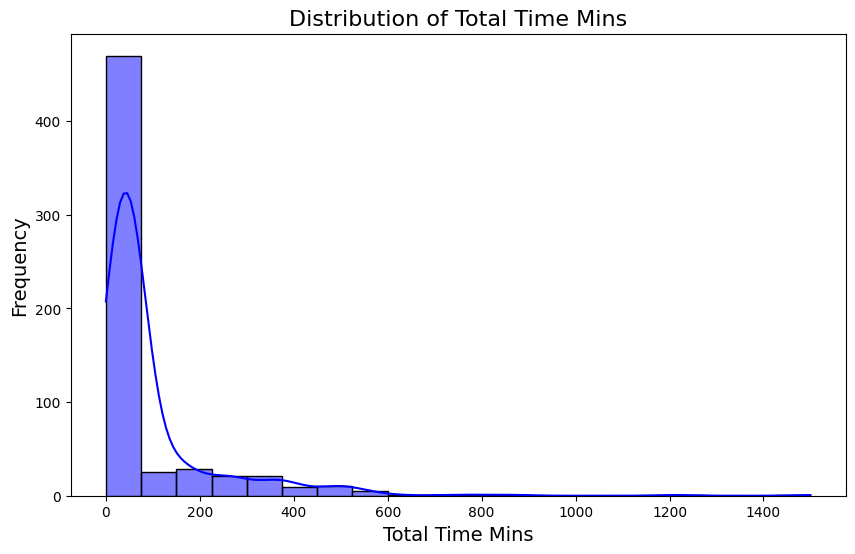

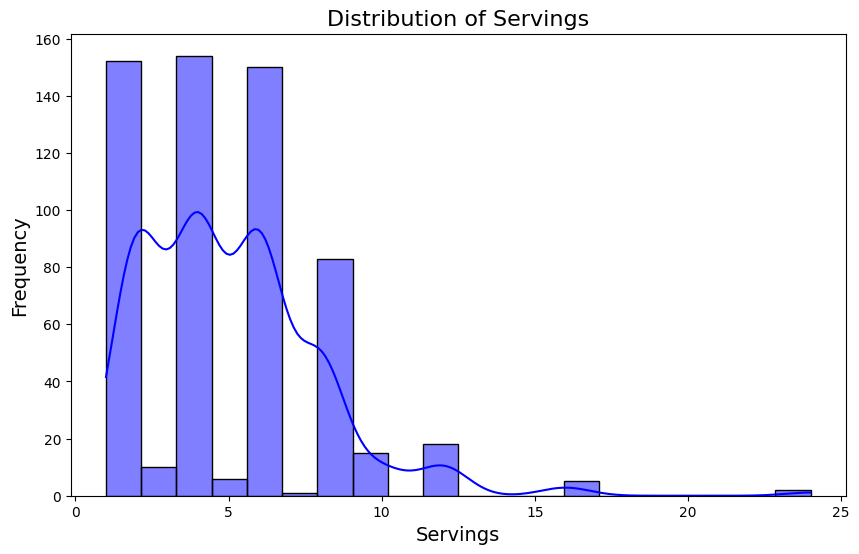

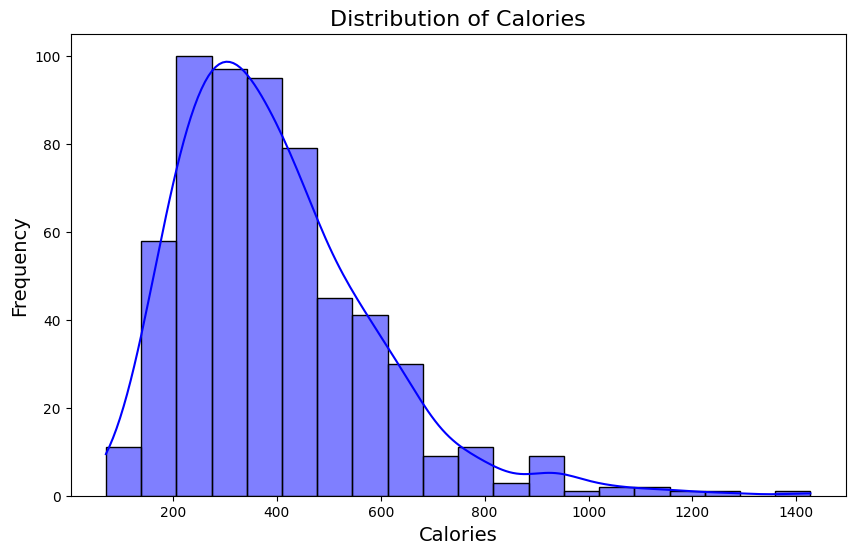

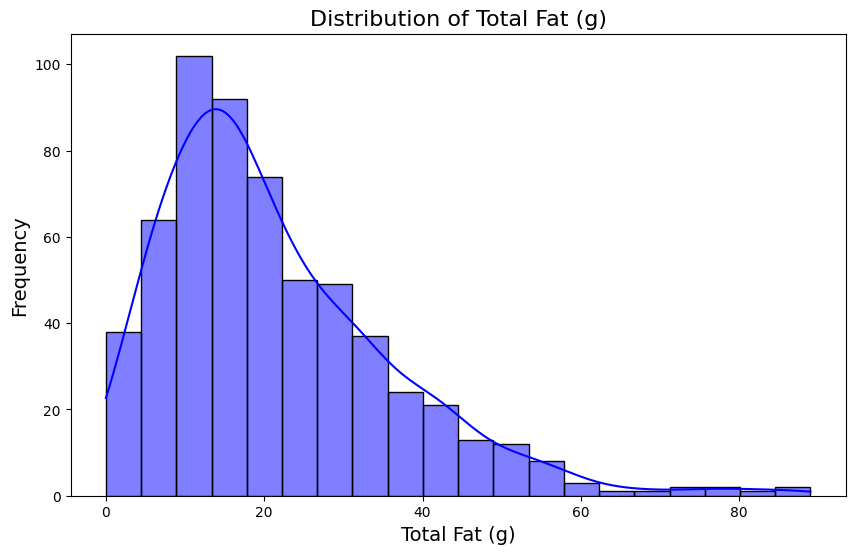

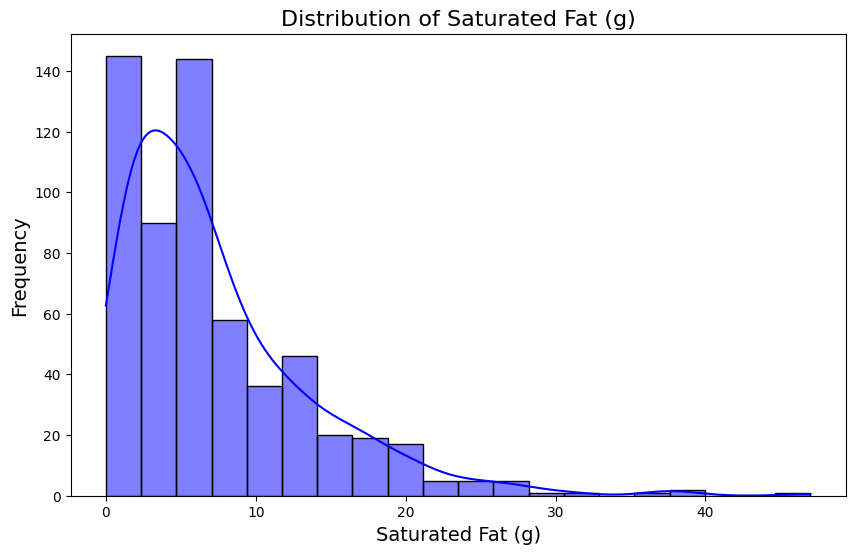

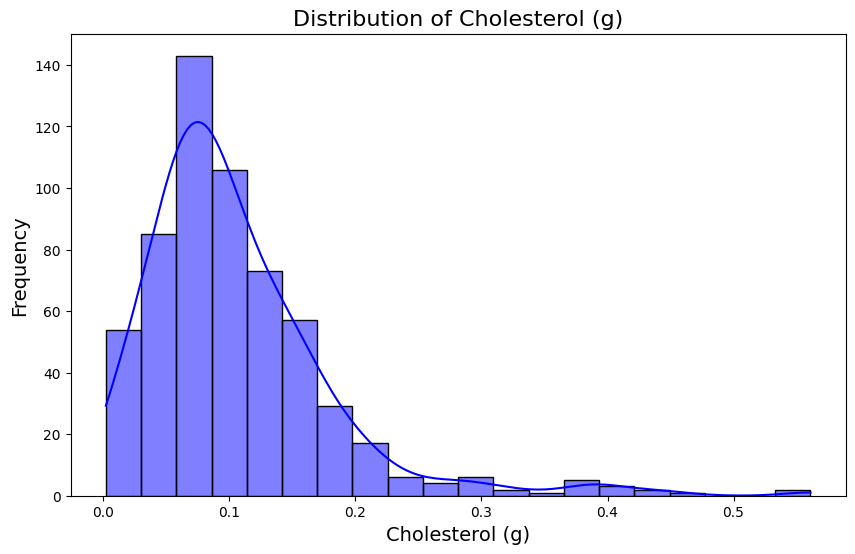

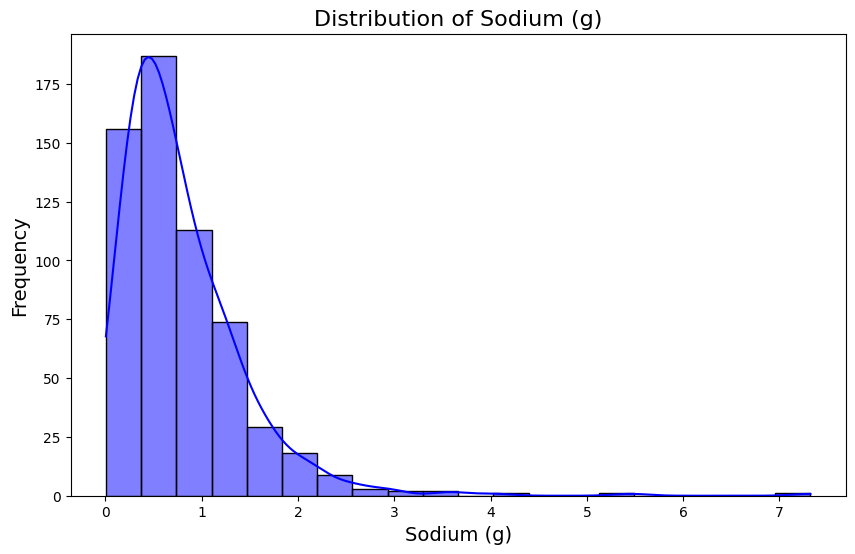

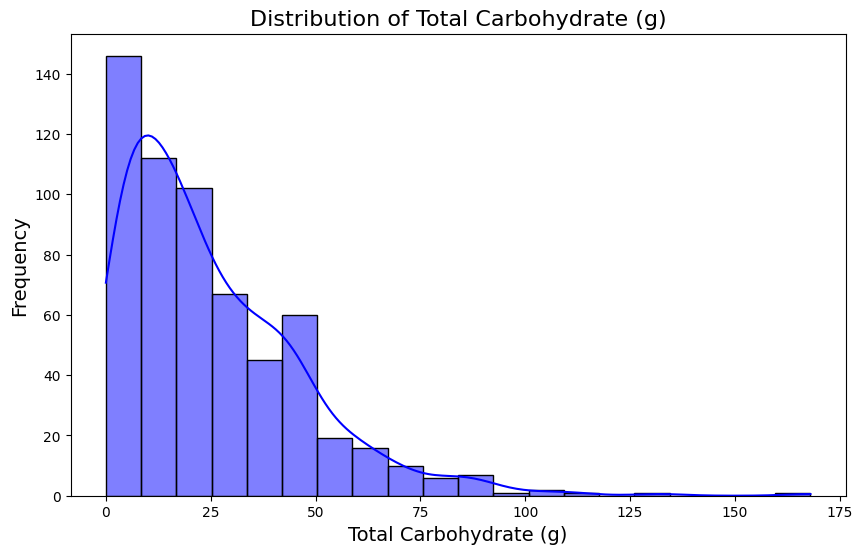

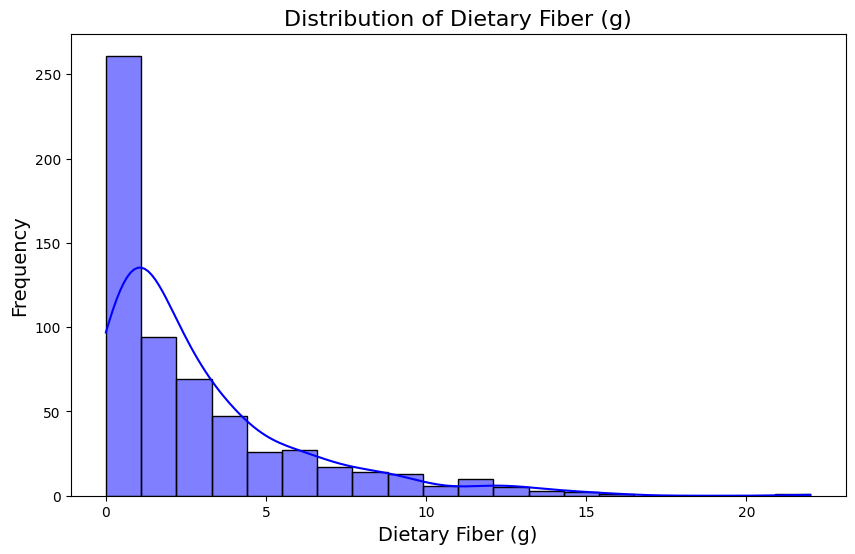

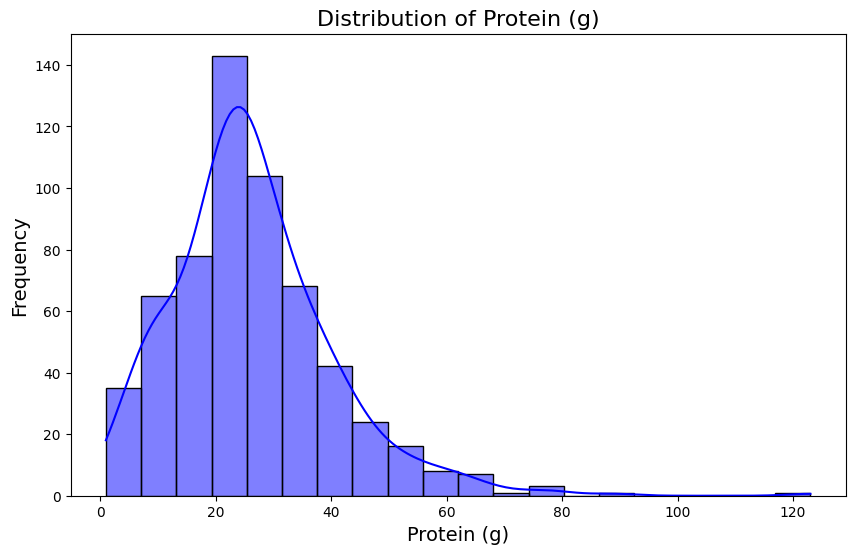

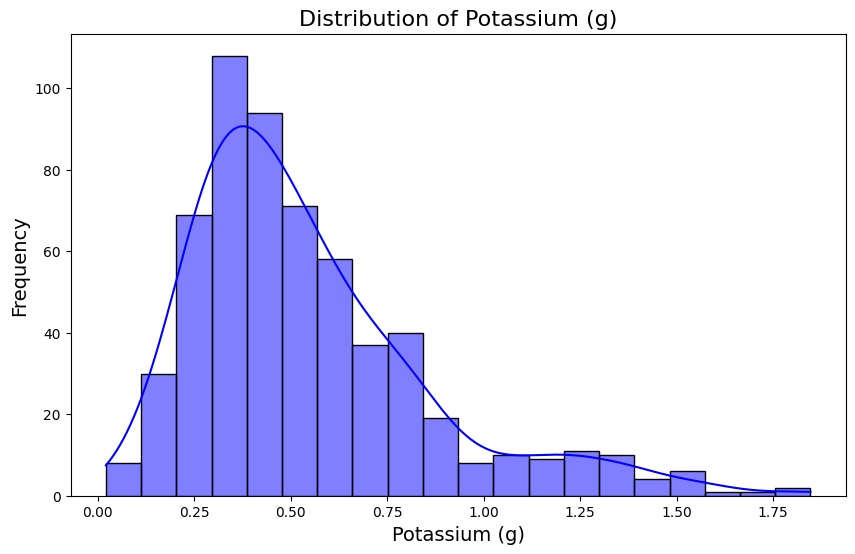

In [837]:
## STEP 2 - Visualize Data and Analyze Relationships:

## Lets visualize numerical plots using hisogram:


import matplotlib.pyplot as plt
import seaborn as sns

# Loop through numeric columns
for col in df.select_dtypes(include=['float64', 'int64']):
    plt.figure(figsize=(10, 6))

    # Plot histogram with KDE
    sns.histplot(df[col], bins=20, kde=True, color="blue")

    # Add title and labels
    plt.title(f"Distribution of {col}", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Frequency", fontsize=14)

    plt.show()


In [838]:
## Analysis on Prep, Cook and Total Time:

## Pointer 1: Most Receipes take a total time of under 100 minutes , with a significant amount of the recipes that would cook under 40 minutes
## Pointer 2: Time can be a very useful analysis to recommend recipes to users - Most of the users generally fall under two categories -
## 1. Time Concious Users - Users who would prefer to cook under 20 to 30 mins
## 2. Quality Oriented Users - Users who are willing to invest time to get the best results
## Pointer 3: For recipes with much more cooking time, compared to prep time we can highlight or market them as 'Hands-Free Cooking' or 'Perfect for Meal Prep'
## Pointer 4: Quick Recipes can be marketed - In this way "Dinner in 20 mins"

In [839]:
## Servings data analysis: Most recipes are designed to serve 2-6 people, with peaks around 2-4 servings.

In [840]:
## Nutrient Data Analysis:

## Pointer 1: Most Recepies are within the range of 200 to 600 with only a few exceeding above 1000 Kcal which seems pretty ok compared to the regular intake
## of users (2000 to 2500 Kcal)

## Pointer 2: Most of the receipes have a fat content of 10 to 40 grams, with a very few exceeding 80 grams. The one's within 10 to 20 grams can be categorized
## has healthy options (Suitabl for weightless, cholestrol issues) , 20 to 40 grams (align with the most Balanced diets)
## and for those exceeding above 40 (suitable for indulgent and rich recipes, and suitable for Keto or low carb diets)

## Pointer 3: Most recepes have cholestrol around 200 mg (Heart Healthy choices), with a very few exceeding 500 mg

## Poiner 4: Foods high in Potassium (>1000 mg) is Beneficial for electrolyte balance and managing blood pressure. Most of the foods have a potassium content
## of around 200 to 1000 mg.

## Pointer 5: Most of recepies have around 10 to 40 grams of protein with a very few exceeding 100 grams . High protein food can be promoted as muscle building
## and recepies with moderate value as Balanced diet option

## Pointer 6: Recipes mostly have carb under 40 (which is suitable for Keto diet) and higher carb diets as "Energy Boosting Meals"

## Pointer 7: Soidum Peak values (Around 0.5 to 1 gram), - Tragetting users with hypertension - low sodium food

## Pointer 8 : High fiber content food (Good for Gut Health) - Pairings low fiber and high fiber food would be a interesting analysis to make

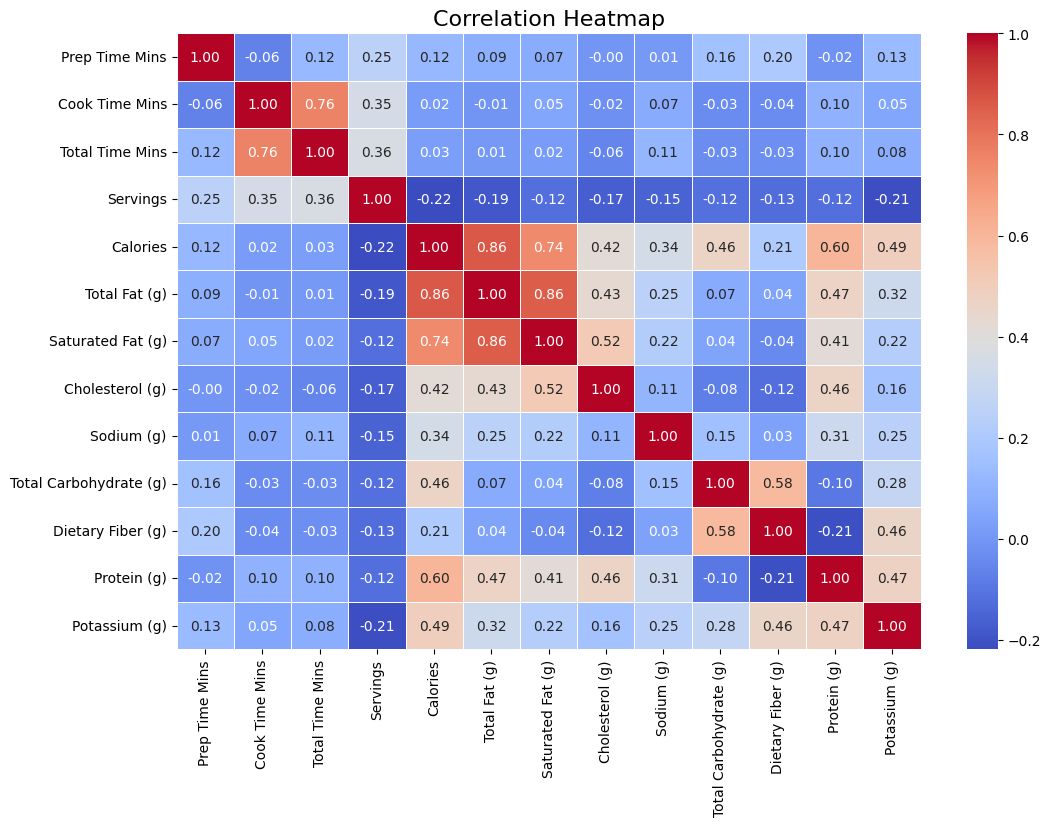

In [841]:
## Lets do a heatmap analysis - for each of the graphs

corr_matrix = df.select_dtypes(include=['float64','int64']).corr()


# Create a heatmap for the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [842]:
## Key Insights from the Heatmap -

## 1. Receipes with very high protein content, can also be classified as the one which are very high in potassium (which are beneficial for muscle function)
## 2. Prep Time, Total Time, Cook Time - Low correlation with all nutrients . Conclusion - (Cook time has mostly no impact on nutritional content)
## 3. Calories have strong positive correlation with fat and saturated fat, and proteins (Can be advertised as "Energy boosting meals for athletes")
## 4. Total Carbhohydrates and Dietary Fiber (positive correlation) - These foods are "Energy Packed and food with good digestion"

In [843]:
## Lets categorize the total time for users into different categories :


for val in df['Total Time Mins']:

  if (val <=25):

    df.loc[df['Total Time Mins'] <= 25, 'Total Time Category'] = 'Under 25 mins'

  elif (val > 25) and (val <= 40):

    df.loc[(df['Total Time Mins'] > 25) & (df['Total Time Mins'] <= 40), 'Total Time Category'] = '25-40 mins'

  elif (val > 40) and (val <= 80):

    df.loc[(df['Total Time Mins'] > 40) & (df['Total Time Mins'] <= 80), 'Total Time Category'] = '40-80 mins'

  elif val > 80:

    df.loc[df['Total Time Mins'] > 80, 'Total Time Category'] = 'Over 80 mins'

  else:

    pass

In [844]:
df.head(3)

,Category,Recipe Name,Prep Time Mins,Cook Time Mins,Total Time Mins,Servings,Ingredients,Calories,Total Fat (g),Saturated Fat (g),Cholesterol (g),Sodium (g),Total Carbohydrate (g),Dietary Fiber (g),Protein (g),Potassium (g),Cleaned_Ingredients,Total Time Category
0,Quick and Easy Dinners for One,Grilled Cheese Sandwich,5,10,15,2,"['4 slices white bread', '3 tablespoons butter...",400.0,28.0,17.0,0.076,0.639,26.0,1.0,11.0,0.083,slices white bread tablespoons butter divided...,Under 25 mins
1,Quick and Easy Dinners for One,Seared Ahi Tuna Steaks,5,2,7,2,"['2 (5 ounce) ahi tuna steaks', '1 teaspoon ko...",301.0,18.0,4.0,0.071,1.034,1.0,0.0,33.0,0.645,ounce ahi tuna steaks teaspoon kosher salt ¼ ...,Under 25 mins
2,Quick and Easy Dinners for One,Fish in Foil,10,15,25,2,"['2 rainbow trout fillets', '1 tablespoon oli...",213.0,11.0,2.0,0.067,1.850,8.0,3.0,24.0,0.663,rainbow trout fillets tablespoon olive oil t...,Under 25 mins


In [845]:
df.drop_duplicates(inplace=True)

In [846]:
df[df['Ingredients']=="['1 pound sweet potatoes', '1 large egg', '1 clove garlic, pressed', '½ teaspoon salt', '½ teaspoon ground nutmeg or to taste', '2 cups all-purpose flour, or as needed']"]

,Category,Recipe Name,Prep Time Mins,Cook Time Mins,Total Time Mins,Servings,Ingredients,Calories,Total Fat (g),Saturated Fat (g),Cholesterol (g),Sodium (g),Total Carbohydrate (g),Dietary Fiber (g),Protein (g),Potassium (g),Cleaned_Ingredients,Total Time Category
264,Vegetarian Main Dishes,Sweet Potato Gnocchi,20,45,60,4,"['1 pound sweet potatoes', '1 large egg', '1 c...",350.0,2.0,1.0,0.047,0.324,72.0,6.0,10.0,0.627,pound sweet potatoes large egg clove garlic ...,40-80 mins
321,Healthy Main Dishes,Sweet Potato Gnocchi,20,45,60,4,"['1 pound sweet potatoes', '1 large egg', '1 c...",350.0,2.0,1.0,0.047,0.324,72.0,6.0,10.0,0.627,pound sweet potatoes large egg clove garlic ...,40-80 mins
395,Pasta Main Dishes,Sweet Potato Gnocchi,20,45,60,4,"['1 pound sweet potatoes', '1 large egg', '1 c...",350.0,2.0,1.0,0.047,0.324,72.0,6.0,10.0,0.627,pound sweet potatoes large egg clove garlic ...,40-80 mins


In [847]:
df_recipe_counts = df['Recipe Name'].value_counts()
filtered_recipes = df_recipe_counts[df_recipe_counts > 1].reset_index()
filtered_recipes.columns = ['Recipe Name', 'Count']

print(len(filtered_recipes))

41


In [848]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                596 non-null    object 
 1   Recipe Name             596 non-null    object 
 2   Prep Time Mins          596 non-null    int64  
 3   Cook Time Mins          596 non-null    int64  
 4   Total Time Mins         596 non-null    int64  
 5   Servings                596 non-null    int64  
 6   Ingredients             596 non-null    object 
 7   Calories                596 non-null    float64
 8   Total Fat (g)           596 non-null    float64
 9   Saturated Fat (g)       596 non-null    float64
 10  Cholesterol (g)         596 non-null    float64
 11  Sodium (g)              596 non-null    float64
 12  Total Carbohydrate (g)  596 non-null    float64
 13  Dietary Fiber (g)       596 non-null    float64
 14  Protein (g)             596 non-null    fl

In [849]:
import plotly.express as px

# Group data by 'Total Time Category' and 'Category'
grouped_data = df.groupby(['Total Time Category', 'Category'])['Total Time Mins'].count().reset_index()
grouped_data.rename(columns={'Total Time Mins': 'Recipe Count'}, inplace=True)

# Create the bar chart
fig = px.bar(
    grouped_data,
    x="Category",
    y="Recipe Count",
    color="Total Time Category",
    title="Recipe Counts by Category and Time Range",
    labels={"Recipe Count": "Number of Recipes", "Total Time Category": "Time Range"},
)

# Update layout for better visualization
fig.update_layout(
    xaxis={'categoryorder': 'total descending'},
    yaxis_title="Number of Recipes",
    xaxis_title="Recipe Categories",
    legend_title="Time Range",
    title_x=0.5,
    font=dict(size=14),
    bargap=0.2,  # Space between bars
)

# Show the chart
fig.show()




In [850]:
## Key Analysis :

## Pointer 1: Categories like "Pork Chops" and "Healthy Main Dishes" show a more balanced distribution across time ranges, indicating a mix of
## quick and longer preparation options for these types of recipes.

## Pointer 2: '40 to 80 mins'  and '25 to 40 mins' seems to be the most dominant time range across all category

## Pointer 3 : Most Popular Categories -
## A. "Quick and Easy Dinners for One" and "Slow Cooker Main Dishes" have the highest number of recipes, showcasing their broad appeal.
## B. Categories like "Side Dishes", "Pasta Main Dishes", and "Main Dishes" have fewer recipes, suggesting either a niche appeal or underrepresentation.

## Pointer 4: Categories like "Side Dishes" and "Pasta Main Dishes" have lower recipe counts.
## These could be expanded to cater to users looking for variety or specific dietary needs (e.g., gluten-free or vegan pasta).

In [851]:
df.head()

,Category,Recipe Name,Prep Time Mins,Cook Time Mins,Total Time Mins,Servings,Ingredients,Calories,Total Fat (g),Saturated Fat (g),Cholesterol (g),Sodium (g),Total Carbohydrate (g),Dietary Fiber (g),Protein (g),Potassium (g),Cleaned_Ingredients,Total Time Category
0,Quick and Easy Dinners for One,Grilled Cheese Sandwich,5,10,15,2,"['4 slices white bread', '3 tablespoons butter...",400.0,28.0,17.0,0.076,0.639,26.0,1.000000,11.0,0.083,slices white bread tablespoons butter divided...,Under 25 mins
1,Quick and Easy Dinners for One,Seared Ahi Tuna Steaks,5,2,7,2,"['2 (5 ounce) ahi tuna steaks', '1 teaspoon ko...",301.0,18.0,4.0,0.071,1.034,1.0,0.000000,33.0,0.645,ounce ahi tuna steaks teaspoon kosher salt ¼ ...,Under 25 mins
2,Quick and Easy Dinners for One,Fish in Foil,10,15,25,2,"['2 rainbow trout fillets', '1 tablespoon oli...",213.0,11.0,2.0,0.067,1.850,8.0,3.000000,24.0,0.663,rainbow trout fillets tablespoon olive oil t...,Under 25 mins
3,Quick and Easy Dinners for One,Brown Sugar Ham Steak,5,20,25,2,"['1 (8 ounce) bone-in fully cooked ham steak',...",521.0,34.0,20.0,0.127,1.648,33.0,2.333333,22.0,0.421,ounce bonein fully cooked ham steak tablespoo...,Under 25 mins
4,Quick and Easy Dinners for One,Pork Fried Rice,10,15,25,2,"['1 tablespoon butter', '1 (6 ounce) boneless ...",557.0,13.0,6.0,0.137,0.815,81.0,3.000000,26.0,0.495,tablespoon butter ounce boneless pork loin c...,Under 25 mins


In [852]:
## Lets do a co-occurence Analysis:

from itertools import combinations
from collections import Counter
import pandas as pd

# Ensure ingredients are cleaned and stored as lists
df['Ingredients'] = df['Ingredients'].apply(lambda x: eval(x) if isinstance(x, str) else x)
df['Ingredients'] = df['Ingredients'].apply(lambda x: [i.lower().strip() for i in x] if isinstance(x, list) else x)

# Generate ingredient pairs
ingredient_pairs = Counter()
for ingredients in df['Ingredients']:
    if isinstance(ingredients, list) and len(ingredients) >= 2:  # Ensure at least 2 ingredients
        ingredient_pairs.update(combinations((ingredients), 2))

# Convert to DataFrame
ingredient_pairs_df = pd.DataFrame(ingredient_pairs.items(), columns=['Pair', 'Count']).sort_values(by='Count', ascending=False)

# Filter by threshold and split Pair into two columns
threshold = 4
ingredient_pairs_df = ingredient_pairs_df[ingredient_pairs_df['Count'] > threshold]
ingredient_pairs_df[['Ingredient 1', 'Ingredient 2']] = pd.DataFrame(ingredient_pairs_df['Pair'].tolist(), index=ingredient_pairs_df.index)
ingredient_pairs_df = ingredient_pairs_df[['Ingredient 1', 'Ingredient 2', 'Count']]




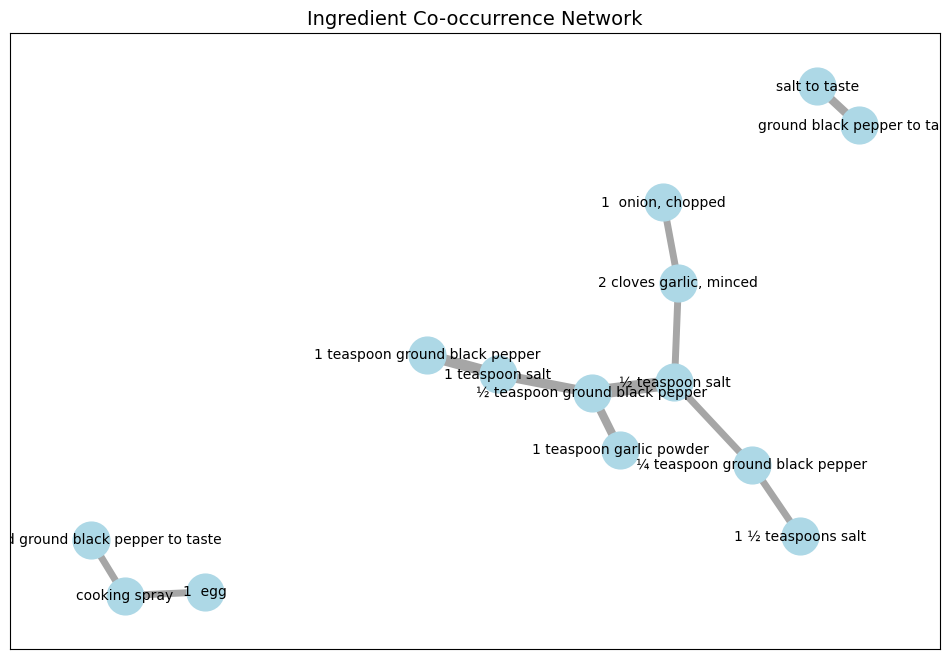

In [853]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph from the co-occurrence data
G = nx.Graph()
for _, row in ingredient_pairs_df.iterrows():
    G.add_edge(row['Ingredient 1'], row['Ingredient 2'], weight=row['Count'])

# Plot the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, seed=42)
edges = G.edges(data=True)
weights = [edge[2]['weight'] for edge in edges]
nx.draw_networkx_nodes(G, pos, node_size=700, node_color="lightblue")
nx.draw_networkx_edges(G, pos, width=weights, edge_color="gray", alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
plt.title("Ingredient Co-occurrence Network", fontsize=14)
plt.show()


In [854]:
## Analysis : (from network chart)

## Common Pairings: Pairs like "salt" and "black pepper" (V.Thick Edge lines) or "garlic" and "onion" are foundational in cooking, forming the base for many recipes.
## Key Business Insights:
## A. Ingredient Suggestion : If a user selects "garlic" in a recipe, you can recommend ingredients that are commonly paired with garlic, like "onion" or "ground black pepper."
## B. Cluster Insight: This cluster likely represents a base seasoning or preparation step for many dishes.

In [855]:
## So we have done some analysis on the recipe data, now lets look into the user data:

user_data.head()


## Since the data is created by us : There seems to be no null values, so we can proceed with some visualizarions for the same

,User_ID,Name,Age,Gender,Height,Weight,BMI,Dietary_Restrictions,Food_Preference,Allergies,Time_Availability,Health_Goal,Preferred_Nutrients,Medical_Conditions
0,4667e60c-d2d3-4a92-8b6a-e1d1eec61466,Kelly Brock,64,Male,171,90,30.78,Gluten-Free,Spicy,Peanuts,25-40 mins,Maintenance,Low Carb,None
1,a4839b78-cac1-4f87-8492-37b6acc6d983,Mr. George Tucker,28,Female,166,79,28.67,None,Savory,"Gluten, Dairy",25-40 mins,Maintenance,High Fiber,High Cholesterol
2,6d29df49-8a21-4e42-a533-9e9fb16065ad,Diana Rodriguez,40,Male,163,81,30.49,Gluten-Free,Sweet,None,Under 25 mins,Boost Immunity,High Protein,None
3,105ac842-5112-4a4f-a819-c446ffaab4bd,Holly Mason,30,Female,175,96,31.35,None,Neutral,None,Under 25 mins,Muscle Gain,Low Carb,High Cholesterol
4,f7a56271-afa6-4891-a5eb-3ec6c836943a,Francis Castaneda,19,Female,195,57,14.99,Gluten-Free,Spicy,None,Under 25 mins,Maintenance,Balanced,Diabetes


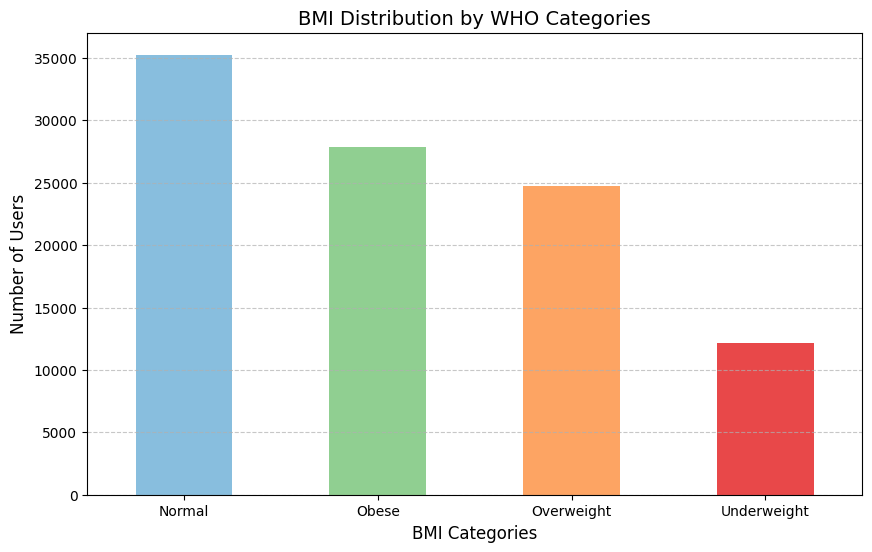

In [856]:
### Lets start off to do a simple analyis - BMI distribution to categorize folks into Underweight, Normal and Obese -


# Define WHO BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal"
    elif 25 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obese"

# Add BMI categories to the dataset
user_data['BMI_Category'] = user_data['BMI'].apply(categorize_bmi)

# Count the number of users in each BMI category
bmi_counts = user_data['BMI_Category'].value_counts()

# Plot the histogram
plt.figure(figsize=(10, 6))
bmi_counts.plot(kind='bar', color=['#6baed6', '#74c476', '#fd8d3c', '#e31a1c'], alpha=0.8)
plt.title("BMI Distribution by WHO Categories", fontsize=14)
plt.xlabel("BMI Categories", fontsize=12)
plt.ylabel("Number of Users", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [857]:
## The bar graph shows the distribution of users across BMI categories based on WHO standards.
## Most users fall into the "Obese" category, indicating a need for weight-loss-focused recipes. The "Normal" category represents the second-largest group,
## suggesting an opportunity to promote balanced meals. The "Overweight" category highlights users who may benefit from healthy, calorie-controlled options,
## while the smaller "Underweight" group could be targeted with calorie-dense, nutrient-rich recipes. This distribution helps in tailoring recipe recommendations
## to support diverse health goals

In [858]:
## Time Availability VS Food Preferences -

import plotly.express as px

# Convert Time Availability to a numerical value for ordering
time_mapping = {'Under 25 mins': 1, '25-40 mins': 2, '40-80 mins': 3, 'Over 80 mins': 4}
user_data['Time_Availability_Numeric'] = user_data['Time_Availability'].map(time_mapping)

# Create the box plot
fig = px.box(
    user_data,
    x='Food_Preference',
    y='Time_Availability_Numeric',
    points='all',  # Include data points
    title='Time Availability vs. Food Preferences',
    labels={
        'Food_Preference': 'Food Preferences',
        'Time_Availability_Numeric': 'Time Availability'
    },
    color='Food_Preference'
)

# Update Y-axis tick labels for better readability
fig.update_layout(
    yaxis=dict(
        tickmode='array',
        tickvals=[1, 2, 3, 4],
        ticktext=['Under 25 mins', '25-40 mins', '40-80 mins', 'Over 80 mins']
    )
)

# Show the plot
fig.show()


In [859]:
## Analysis :

## 1. Half of the sour food lovers prefer quick meals (≤40 mins).The other half are open to long-prep recipes (≥40 mins, with a strong segment >80 mins).
## For personalized recommendations, offering both quick and gourmet sour recipes would be effective.

## 2. Short-prep sweets (Under 25 mins): Target busy individuals looking for quick indulgences. Longer-prep sweets (80+ mins):
## Appeal to passionate home bakers who enjoy making detailed, artisanal desserts.

## 3. People are willing to give good amount of time for preparing spicy food.

In [860]:

## Medical conditions Vs Dietery Restrictsions

user_data.head()


,User_ID,Name,Age,Gender,Height,Weight,BMI,Dietary_Restrictions,Food_Preference,Allergies,Time_Availability,Health_Goal,Preferred_Nutrients,Medical_Conditions,BMI_Category,Time_Availability_Numeric
0,4667e60c-d2d3-4a92-8b6a-e1d1eec61466,Kelly Brock,64,Male,171,90,30.78,Gluten-Free,Spicy,Peanuts,25-40 mins,Maintenance,Low Carb,None,Obese,2
1,a4839b78-cac1-4f87-8492-37b6acc6d983,Mr. George Tucker,28,Female,166,79,28.67,None,Savory,"Gluten, Dairy",25-40 mins,Maintenance,High Fiber,High Cholesterol,Overweight,2
2,6d29df49-8a21-4e42-a533-9e9fb16065ad,Diana Rodriguez,40,Male,163,81,30.49,Gluten-Free,Sweet,None,Under 25 mins,Boost Immunity,High Protein,None,Obese,1
3,105ac842-5112-4a4f-a819-c446ffaab4bd,Holly Mason,30,Female,175,96,31.35,None,Neutral,None,Under 25 mins,Muscle Gain,Low Carb,High Cholesterol,Obese,1
4,f7a56271-afa6-4891-a5eb-3ec6c836943a,Francis Castaneda,19,Female,195,57,14.99,Gluten-Free,Spicy,None,Under 25 mins,Maintenance,Balanced,Diabetes,Underweight,1


<ipython-input-861-63b109cbe01b>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




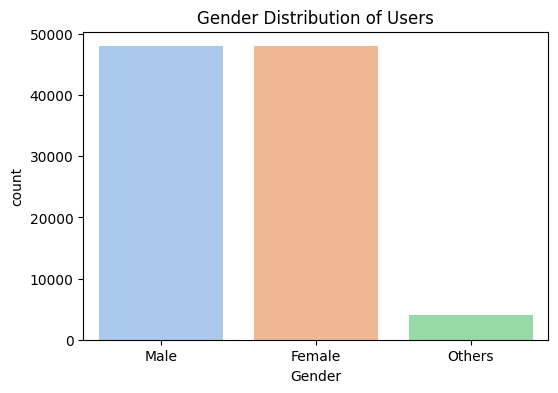

<ipython-input-861-63b109cbe01b>:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




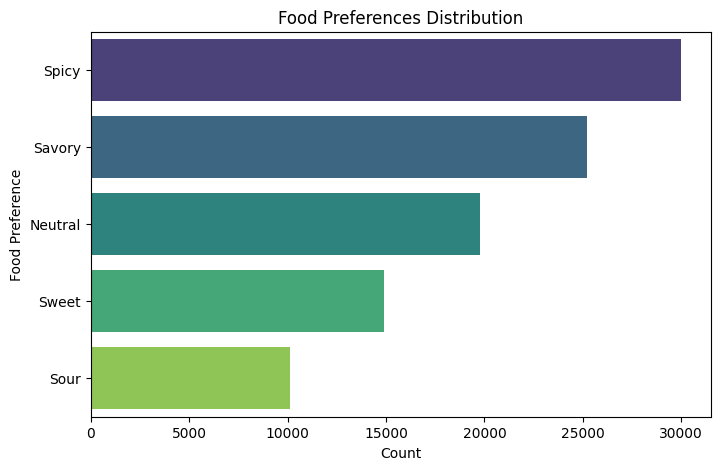

In [861]:
# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", data=user_data, palette="pastel")
plt.title("Gender Distribution of Users")
plt.show()

# Food Preferences
plt.figure(figsize=(8, 5))
sns.countplot(y="Food_Preference", data=user_data, order=user_data["Food_Preference"].value_counts().index, palette="viridis")
plt.title("Food Preferences Distribution")
plt.xlabel("Count")
plt.ylabel("Food Preference")
plt.show()


In [862]:
## There is equal proportion of male and females in the users data which can lead to some interesting statistcal tests in further analysis

## Based on the food preferences Highlight spicy food categories prominently in the recommendation system.
## Balance sweet recipes with health-conscious alternatives (low-carb, sugar-free options).

In [863]:
## Medical Condition Risk Map -

import plotly.express as px

# Create Sunburst Chart
fig = px.sunburst(user_data, path=['Health_Goal', 'Preferred_Nutrients', 'Medical_Conditions'], values=[1]*len(user_data),
                  title="Health Goals & Medical Conditions Risk Map")
fig.show()


In [864]:
## Majority of the Users focus on Weight loss, followed by maintenance and muscle loss
## Weight Loss Users → Prefer low-carb, high-fiber, and low-fat meals.
## Muscle Gain Users → Prefer high-protein and balanced diets.
## Users with no medical conditions have varied preferences, meaning a flexible recommendation system is ideal.


In [865]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   User_ID                    100000 non-null  object 
 1   Name                       100000 non-null  object 
 2   Age                        100000 non-null  int64  
 3   Gender                     100000 non-null  object 
 4   Height                     100000 non-null  int64  
 5   Weight                     100000 non-null  int64  
 6   BMI                        100000 non-null  float64
 7   Dietary_Restrictions       100000 non-null  object 
 8   Food_Preference            100000 non-null  object 
 9   Allergies                  100000 non-null  object 
 10  Time_Availability          100000 non-null  object 
 11  Health_Goal                100000 non-null  object 
 12  Preferred_Nutrients        100000 non-null  object 
 13  Medical_Conditions         100

In [866]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                596 non-null    object 
 1   Recipe Name             596 non-null    object 
 2   Prep Time Mins          596 non-null    int64  
 3   Cook Time Mins          596 non-null    int64  
 4   Total Time Mins         596 non-null    int64  
 5   Servings                596 non-null    int64  
 6   Ingredients             596 non-null    object 
 7   Calories                596 non-null    float64
 8   Total Fat (g)           596 non-null    float64
 9   Saturated Fat (g)       596 non-null    float64
 10  Cholesterol (g)         596 non-null    float64
 11  Sodium (g)              596 non-null    float64
 12  Total Carbohydrate (g)  596 non-null    float64
 13  Dietary Fiber (g)       596 non-null    float64
 14  Protein (g)             596 non-null    fl

# **FEATURE ENGINEERING**

In [867]:
## No. of Ingredients could be something interesting to look into  - since some people are very busy or might not have groceries at home, so simple
## receipes would be helpful

df["No_of_Ingredients"] = df["Ingredients"].apply(lambda x: len(x))

In [868]:
## Ingredient Subsitution would be really helpful
## Here is a list of subsitutes :


ingredient_substitutes = {
    # 🥛 Dairy Substitutes
    "milk": "almond milk",
    "buttermilk": "almond milk + lemon juice",
    "cream": "coconut cream",
    "cheese": "nutritional yeast",
    "butter": "olive oil",
    "yogurt": "coconut yogurt",
    "sour cream": "cashew cream",
    "whipped cream": "chilled coconut cream",

    # 🥚 Egg Substitutes
    "egg": "flaxseed meal + water",
    "egg white": "aquafaba",
    "mayonnaise": "hummus",

    # 🍗 Meat & Protein Substitutes
    "chicken": "tofu",
    "beef": "lentils",
    "ground beef": "mushrooms",
    "fish": "hearts of palm",
    "shrimp": "king oyster mushrooms",
    "bacon": "smoked tempeh",
    "hot dogs": "carrot dogs",
    "pork": "jackfruit",

    # 🍞 Flour & Gluten-Free Substitutes
    "wheat flour": "almond flour",
    "bread crumbs": "ground flaxseeds",
    "pasta": "zucchini noodles",
    "tortilla wraps": "lettuce wraps",

    # 🍬 Sugar & Sweetener Substitutes
    "sugar": "coconut sugar",
    "honey": "maple syrup",
    "brown sugar": "date sugar",
    "powdered sugar": "monk fruit powder",

    # 🥦 Low-Carb & Keto Substitutes
    "rice": "cauliflower rice",
    "potatoes": "mashed cauliflower",
    "fries": "zucchini fries",
    "pizza crust": "cauliflower crust",
    "taco shells": "lettuce wraps",
    "pasta": "spaghetti squash",

    # 🥤 Cooking Liquids & Thickeners
    "cornstarch": "arrowroot powder",
    "heavy cream": "coconut cream",
    "soy sauce": "coconut aminos",
    "vinegar": "lemon juice",

    # 🧂 Seasonings & Miscellaneous
    "salt": "sea salt",
    "baking powder": "baking soda + lemon juice",
    "ketchup": "tomato paste + vinegar + honey",
    "mustard": "horseradish",
}


In [869]:
def generate_substitutes(ingredients):
    substitutes = []
    for ingredient in ingredients:
        ingredient_lower = ingredient.lower().strip()
        # Find first matching substitute while preserving quantity & descriptions
        found_substitute = next(
            (ingredient_lower.replace(key, sub) for key, sub in ingredient_substitutes.items() if key in ingredient_lower),
            ingredient  # Keep original if no substitute found
        )
        substitutes.append(found_substitute)
    return substitutes


df["Substitutes"] = df["Ingredients"].apply(lambda x: generate_substitutes(eval(x)) if isinstance(x, str) else generate_substitutes(x))


In [870]:
df[['Ingredients','Substitutes']]

,Ingredients,Substitutes
0,"[4 slices white bread, 3 tablespoons butter, d...","[4 slices white bread, 3 tablespoons olive oil..."
1,"[2 (5 ounce) ahi tuna steaks, 1 teaspoon koshe...","[2 (5 ounce) ahi tuna steaks, 1 teaspoon koshe..."
2,"[2 rainbow trout fillets, 1 tablespoon olive ...","[2 rainbow trout fillets, 1 tablespoon olive ..."
3,"[1 (8 ounce) bone-in fully cooked ham steak, 5...","[1 (8 ounce) bone-in fully cooked ham steak, 5..."
4,"[1 tablespoon butter, 1 (6 ounce) boneless por...","[1 tablespoon olive oil, 1 (6 ounce) boneless ..."
...,...,...
591,"[1 tablespoon olive oil, 6 (4 ounce) bone-in, ...","[1 tablespoon olive oil, 6 (4 ounce) bone-in, ..."
592,"[cooking spray, 1 cup mayonnaise, 1 teaspoon p...","[cooking spray, 1 cup hummus, 1 teaspoon papri..."
593,"[¼ cup lemon juice, ¼ cup olive oil, 4 cloves ...","[¼ cup lemon juice, ¼ cup olive oil, 4 cloves ..."
594,"[4 large firm pears - peeled, cored, and quart...","[4 large firm pears - peeled, cored, and quart..."


In [871]:
df['Ingredients']

,Ingredients
0,"[4 slices white bread, 3 tablespoons butter, d..."
1,"[2 (5 ounce) ahi tuna steaks, 1 teaspoon koshe..."
2,"[2 rainbow trout fillets, 1 tablespoon olive ..."
3,"[1 (8 ounce) bone-in fully cooked ham steak, 5..."
4,"[1 tablespoon butter, 1 (6 ounce) boneless por..."
...,...
591,"[1 tablespoon olive oil, 6 (4 ounce) bone-in, ..."
592,"[cooking spray, 1 cup mayonnaise, 1 teaspoon p..."
593,"[¼ cup lemon juice, ¼ cup olive oil, 4 cloves ..."
594,"[4 large firm pears - peeled, cored, and quart..."


# **ENCODING**

In [872]:
## Feature Engineering and Encoding -

user_data.head()

,User_ID,Name,Age,Gender,Height,Weight,BMI,Dietary_Restrictions,Food_Preference,Allergies,Time_Availability,Health_Goal,Preferred_Nutrients,Medical_Conditions,BMI_Category,Time_Availability_Numeric
0,4667e60c-d2d3-4a92-8b6a-e1d1eec61466,Kelly Brock,64,Male,171,90,30.78,Gluten-Free,Spicy,Peanuts,25-40 mins,Maintenance,Low Carb,None,Obese,2
1,a4839b78-cac1-4f87-8492-37b6acc6d983,Mr. George Tucker,28,Female,166,79,28.67,None,Savory,"Gluten, Dairy",25-40 mins,Maintenance,High Fiber,High Cholesterol,Overweight,2
2,6d29df49-8a21-4e42-a533-9e9fb16065ad,Diana Rodriguez,40,Male,163,81,30.49,Gluten-Free,Sweet,None,Under 25 mins,Boost Immunity,High Protein,None,Obese,1
3,105ac842-5112-4a4f-a819-c446ffaab4bd,Holly Mason,30,Female,175,96,31.35,None,Neutral,None,Under 25 mins,Muscle Gain,Low Carb,High Cholesterol,Obese,1
4,f7a56271-afa6-4891-a5eb-3ec6c836943a,Francis Castaneda,19,Female,195,57,14.99,Gluten-Free,Spicy,None,Under 25 mins,Maintenance,Balanced,Diabetes,Underweight,1


In [873]:
## Lets start the encoding process for the users data

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler


## Now first, I will start off with Label Encoding for data with Health Goal, Dietery Restricstions -

print('Value counts for Dietery Restrictions',user_data['Dietary_Restrictions'].value_counts())
print('Value counts for Health Goals',user_data['Health_Goal'].value_counts())

## Reason - Ranking based on how restrctive they are like None (0), Vegetarion (1) - no meat , Vegan (2) - avoid all animal products, Keto (4) - significantlty restrictive

## Health Goal directly proportional to the nutritional requirements we have - like weight loss (Needs calorie deficit, lower energy intake.), to boosting immunity (Requires high nutritional content)

# Define a custom encoding order
health_goal_mapping = {
    "Weight Loss": 0,
    "Maintenance": 1,
    "Muscle Gain": 2,
    "Boost Immunity": 3
}

# Apply encoding
user_data["Health_Goal_Encoded"] = user_data["Health_Goal"].map(health_goal_mapping)


Value counts for Dietery Restrictions Dietary_Restrictions
None           49982
Vegetarian     19814
Keto           15117
Gluten-Free    10045
Vegan           5042
Name: count, dtype: int64
Value counts for Health Goals Health_Goal
Weight Loss       39920
Maintenance       25160
Muscle Gain       20001
Boost Immunity    14919
Name: count, dtype: int64


In [874]:
dietary_restriction_mapping = {
    "None": 0,
    "Vegetarian": 1,
    "Keto": 2,
    "Gluten-Free": 3,
    "Vegan": 4
}

user_data['Dietary_Restrictions_Encoded'] = user_data['Dietary_Restrictions'].map(dietary_restriction_mapping)

user_data.head()

,User_ID,Name,Age,Gender,Height,Weight,BMI,Dietary_Restrictions,Food_Preference,Allergies,Time_Availability,Health_Goal,Preferred_Nutrients,Medical_Conditions,BMI_Category,Time_Availability_Numeric,Health_Goal_Encoded,Dietary_Restrictions_Encoded
0,4667e60c-d2d3-4a92-8b6a-e1d1eec61466,Kelly Brock,64,Male,171,90,30.78,Gluten-Free,Spicy,Peanuts,25-40 mins,Maintenance,Low Carb,None,Obese,2,1,3
1,a4839b78-cac1-4f87-8492-37b6acc6d983,Mr. George Tucker,28,Female,166,79,28.67,None,Savory,"Gluten, Dairy",25-40 mins,Maintenance,High Fiber,High Cholesterol,Overweight,2,1,0
2,6d29df49-8a21-4e42-a533-9e9fb16065ad,Diana Rodriguez,40,Male,163,81,30.49,Gluten-Free,Sweet,None,Under 25 mins,Boost Immunity,High Protein,None,Obese,1,3,3
3,105ac842-5112-4a4f-a819-c446ffaab4bd,Holly Mason,30,Female,175,96,31.35,None,Neutral,None,Under 25 mins,Muscle Gain,Low Carb,High Cholesterol,Obese,1,2,0
4,f7a56271-afa6-4891-a5eb-3ec6c836943a,Francis Castaneda,19,Female,195,57,14.99,Gluten-Free,Spicy,None,Under 25 mins,Maintenance,Balanced,Diabetes,Underweight,1,1,3


In [875]:
user_data.head()

,User_ID,Name,Age,Gender,Height,Weight,BMI,Dietary_Restrictions,Food_Preference,Allergies,Time_Availability,Health_Goal,Preferred_Nutrients,Medical_Conditions,BMI_Category,Time_Availability_Numeric,Health_Goal_Encoded,Dietary_Restrictions_Encoded
0,4667e60c-d2d3-4a92-8b6a-e1d1eec61466,Kelly Brock,64,Male,171,90,30.78,Gluten-Free,Spicy,Peanuts,25-40 mins,Maintenance,Low Carb,None,Obese,2,1,3
1,a4839b78-cac1-4f87-8492-37b6acc6d983,Mr. George Tucker,28,Female,166,79,28.67,None,Savory,"Gluten, Dairy",25-40 mins,Maintenance,High Fiber,High Cholesterol,Overweight,2,1,0
2,6d29df49-8a21-4e42-a533-9e9fb16065ad,Diana Rodriguez,40,Male,163,81,30.49,Gluten-Free,Sweet,None,Under 25 mins,Boost Immunity,High Protein,None,Obese,1,3,3
3,105ac842-5112-4a4f-a819-c446ffaab4bd,Holly Mason,30,Female,175,96,31.35,None,Neutral,None,Under 25 mins,Muscle Gain,Low Carb,High Cholesterol,Obese,1,2,0
4,f7a56271-afa6-4891-a5eb-3ec6c836943a,Francis Castaneda,19,Female,195,57,14.99,Gluten-Free,Spicy,None,Under 25 mins,Maintenance,Balanced,Diabetes,Underweight,1,1,3


In [876]:
## I will keep the user_id and Name in index.. they are not essential for model building - but can be used later when say we plan to start a marketing campaign
## I might need details like whom to send mail to whom not -


user_data.set_index(['User_ID','Name'],inplace= True)



In [877]:
user_data

,,Age,Gender,Height,Weight,BMI,Dietary_Restrictions,Food_Preference,Allergies,Time_Availability,Health_Goal,Preferred_Nutrients,Medical_Conditions,BMI_Category,Time_Availability_Numeric,Health_Goal_Encoded,Dietary_Restrictions_Encoded
User_ID,Name,,,,,,,,,,,,,,,,
4667e60c-d2d3-4a92-8b6a-e1d1eec61466,Kelly Brock,64,Male,171,90,30.78,Gluten-Free,Spicy,Peanuts,25-40 mins,Maintenance,Low Carb,None,Obese,2,1,3
a4839b78-cac1-4f87-8492-37b6acc6d983,Mr. George Tucker,28,Female,166,79,28.67,None,Savory,"Gluten, Dairy",25-40 mins,Maintenance,High Fiber,High Cholesterol,Overweight,2,1,0
6d29df49-8a21-4e42-a533-9e9fb16065ad,Diana Rodriguez,40,Male,163,81,30.49,Gluten-Free,Sweet,None,Under 25 mins,Boost Immunity,High Protein,None,Obese,1,3,3
105ac842-5112-4a4f-a819-c446ffaab4bd,Holly Mason,30,Female,175,96,31.35,None,Neutral,None,Under 25 mins,Muscle Gain,Low Carb,High Cholesterol,Obese,1,2,0
f7a56271-afa6-4891-a5eb-3ec6c836943a,Francis Castaneda,19,Female,195,57,14.99,Gluten-Free,Spicy,None,Under 25 mins,Maintenance,Balanced,Diabetes,Underweight,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7ce712d2-db5e-4c87-b3c2-d6c5c8f470f6,Kelly Jones,63,Female,172,86,29.07,Vegetarian,Savory,None,25-40 mins,Weight Loss,High Fiber,None,Overweight,2,0,1
56d75d4e-9116-441f-a71c-eb1c9dc35da9,Jeremiah Lawson,18,Female,185,63,18.41,None,Sweet,Soy,25-40 mins,Weight Loss,High Protein,None,Underweight,2,0,0
0fe69712-1e23-4683-b5b2-37e301e0e291,Lynn Stewart,24,Female,199,76,19.19,Gluten-Free,Neutral,None,25-40 mins,Boost Immunity,High Fiber,None,Normal,2,3,3


In [878]:
user_data['Food_Preference'].value_counts()

,count
Food_Preference,
Spicy,29991
Savory,25209
Neutral,19780
Sweet,14891
Sour,10129


In [879]:
## Lets do a one hot encoding with a gender column -

user_data_encoded = pd.get_dummies(user_data, columns=['Gender'], drop_first=True)

user_data_encoded[['Gender_Male','Gender_Others']] = user_data_encoded[['Gender_Male','Gender_Others']].astype(int)

user_data_encoded.head()

,,Age,Height,Weight,BMI,Dietary_Restrictions,Food_Preference,Allergies,Time_Availability,Health_Goal,Preferred_Nutrients,Medical_Conditions,BMI_Category,Time_Availability_Numeric,Health_Goal_Encoded,Dietary_Restrictions_Encoded,Gender_Male,Gender_Others
User_ID,Name,,,,,,,,,,,,,,,,,
4667e60c-d2d3-4a92-8b6a-e1d1eec61466,Kelly Brock,64,171,90,30.78,Gluten-Free,Spicy,Peanuts,25-40 mins,Maintenance,Low Carb,None,Obese,2,1,3,1,0
a4839b78-cac1-4f87-8492-37b6acc6d983,Mr. George Tucker,28,166,79,28.67,None,Savory,"Gluten, Dairy",25-40 mins,Maintenance,High Fiber,High Cholesterol,Overweight,2,1,0,0,0
6d29df49-8a21-4e42-a533-9e9fb16065ad,Diana Rodriguez,40,163,81,30.49,Gluten-Free,Sweet,None,Under 25 mins,Boost Immunity,High Protein,None,Obese,1,3,3,1,0
105ac842-5112-4a4f-a819-c446ffaab4bd,Holly Mason,30,175,96,31.35,None,Neutral,None,Under 25 mins,Muscle Gain,Low Carb,High Cholesterol,Obese,1,2,0,0,0
f7a56271-afa6-4891-a5eb-3ec6c836943a,Francis Castaneda,19,195,57,14.99,Gluten-Free,Spicy,None,Under 25 mins,Maintenance,Balanced,Diabetes,Underweight,1,1,3,0,0


In [880]:
user_data_encoded.head()

,,Age,Height,Weight,BMI,Dietary_Restrictions,Food_Preference,Allergies,Time_Availability,Health_Goal,Preferred_Nutrients,Medical_Conditions,BMI_Category,Time_Availability_Numeric,Health_Goal_Encoded,Dietary_Restrictions_Encoded,Gender_Male,Gender_Others
User_ID,Name,,,,,,,,,,,,,,,,,
4667e60c-d2d3-4a92-8b6a-e1d1eec61466,Kelly Brock,64,171,90,30.78,Gluten-Free,Spicy,Peanuts,25-40 mins,Maintenance,Low Carb,None,Obese,2,1,3,1,0
a4839b78-cac1-4f87-8492-37b6acc6d983,Mr. George Tucker,28,166,79,28.67,None,Savory,"Gluten, Dairy",25-40 mins,Maintenance,High Fiber,High Cholesterol,Overweight,2,1,0,0,0
6d29df49-8a21-4e42-a533-9e9fb16065ad,Diana Rodriguez,40,163,81,30.49,Gluten-Free,Sweet,None,Under 25 mins,Boost Immunity,High Protein,None,Obese,1,3,3,1,0
105ac842-5112-4a4f-a819-c446ffaab4bd,Holly Mason,30,175,96,31.35,None,Neutral,None,Under 25 mins,Muscle Gain,Low Carb,High Cholesterol,Obese,1,2,0,0,0
f7a56271-afa6-4891-a5eb-3ec6c836943a,Francis Castaneda,19,195,57,14.99,Gluten-Free,Spicy,None,Under 25 mins,Maintenance,Balanced,Diabetes,Underweight,1,1,3,0,0


In [881]:
user_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 100000 entries, ('4667e60c-d2d3-4a92-8b6a-e1d1eec61466', 'Kelly Brock') to ('6bfe7004-9ef2-4ff8-abd4-d77a1ec0e6dc', 'Randy Webb')
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           100000 non-null  int64  
 1   Height                        100000 non-null  int64  
 2   Weight                        100000 non-null  int64  
 3   BMI                           100000 non-null  float64
 4   Dietary_Restrictions          100000 non-null  object 
 5   Food_Preference               100000 non-null  object 
 6   Allergies                     100000 non-null  object 
 7   Time_Availability             100000 non-null  object 
 8   Health_Goal                   100000 non-null  object 
 9   Preferred_Nutrients           100000 non-null  object 
 10  Medical_Conditions            100000 non-null  object 
 11  BM

In [882]:
## Now for food preferences - we have only data for one user - per row .. showing the food preferences now a person who like spicy might like savoury
## food as well, in tht context we have use qord2vec. However, the algorithm does not have any context to judge similarity on. So the idea is to use a column
## like health Goal preferences to group users get the list of food preferences based on health Goal.

## Now in grouped val it will be checkign which word co-occurs the most,


grouped_val = user_data_encoded.groupby('Health_Goal')['Food_Preference'].apply(list).tolist()



from gensim.models import word2vec


w2model = word2vec.Word2Vec(grouped_val,vector_size=4,window=2,sg=1,min_count=2)


# Get vector representation for "Spicy"
print("Word2Vec - Vector for 'Spicy':", w2model.wv["Spicy"])

# Find most similar food preferences
print("Word2Vec - Most similar to 'Spicy':", w2model.wv.most_similar("Spicy"))

Word2Vec - Vector for 'Spicy': [-0.47153738 -0.12806225  0.3672918   0.4427586 ]
Word2Vec - Most similar to 'Spicy': [('Neutral', 0.9906570315361023), ('Sour', 0.9841856956481934), ('Savory', 0.9831641912460327), ('Sweet', 0.9761086702346802)]


In [883]:
## Now get this column into your data frame:

user_data_encoded['Food_Preference_Encoded'] = user_data_encoded['Food_Preference'].apply(lambda x: w2model.wv[x])

user_data_encoded.head()

,,Age,Height,Weight,BMI,Dietary_Restrictions,Food_Preference,Allergies,Time_Availability,Health_Goal,Preferred_Nutrients,Medical_Conditions,BMI_Category,Time_Availability_Numeric,Health_Goal_Encoded,Dietary_Restrictions_Encoded,Gender_Male,Gender_Others,Food_Preference_Encoded
User_ID,Name,,,,,,,,,,,,,,,,,,
4667e60c-d2d3-4a92-8b6a-e1d1eec61466,Kelly Brock,64,171,90,30.78,Gluten-Free,Spicy,Peanuts,25-40 mins,Maintenance,Low Carb,None,Obese,2,1,3,1,0,"[-0.47153738, -0.12806225, 0.3672918, 0.4427586]"
a4839b78-cac1-4f87-8492-37b6acc6d983,Mr. George Tucker,28,166,79,28.67,None,Savory,"Gluten, Dairy",25-40 mins,Maintenance,High Fiber,High Cholesterol,Overweight,2,1,0,0,0,"[-0.52594423, -0.21147193, 0.34887037, 0.3486764]"
6d29df49-8a21-4e42-a533-9e9fb16065ad,Diana Rodriguez,40,163,81,30.49,Gluten-Free,Sweet,None,Under 25 mins,Boost Immunity,High Protein,None,Obese,1,3,3,1,0,"[-0.5781588, -0.11938799, 0.25785294, 0.38249934]"
105ac842-5112-4a4f-a819-c446ffaab4bd,Holly Mason,30,175,96,31.35,None,Neutral,None,Under 25 mins,Muscle Gain,Low Carb,High Cholesterol,Obese,1,2,0,0,0,"[-0.49362665, -0.113627054, 0.41506383, 0.3554..."
f7a56271-afa6-4891-a5eb-3ec6c836943a,Francis Castaneda,19,195,57,14.99,Gluten-Free,Spicy,None,Under 25 mins,Maintenance,Balanced,Diabetes,Underweight,1,1,3,0,0,"[-0.47153738, -0.12806225, 0.3672918, 0.4427586]"


In [884]:
user_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 100000 entries, ('4667e60c-d2d3-4a92-8b6a-e1d1eec61466', 'Kelly Brock') to ('6bfe7004-9ef2-4ff8-abd4-d77a1ec0e6dc', 'Randy Webb')
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           100000 non-null  int64  
 1   Height                        100000 non-null  int64  
 2   Weight                        100000 non-null  int64  
 3   BMI                           100000 non-null  float64
 4   Dietary_Restrictions          100000 non-null  object 
 5   Food_Preference               100000 non-null  object 
 6   Allergies                     100000 non-null  object 
 7   Time_Availability             100000 non-null  object 
 8   Health_Goal                   100000 non-null  object 
 9   Preferred_Nutrients           100000 non-null  object 
 10  Medical_Conditions            100000 non-null  object 
 11  BM

In [885]:
user_data_encoded['Preferred_Nutrients'].value_counts()


## the avriation seems very less

,count
Preferred_Nutrients,
High Protein,25025
Balanced,20026
Low Carb,19983
Low Fat,19872
High Fiber,15094


In [886]:
## Do the same as food preference between Nutrient preference

grouped_val = user_data_encoded.groupby('Health_Goal')['Preferred_Nutrients'].apply(list).tolist()


from gensim.models import word2vec


w2model = word2vec.Word2Vec(grouped_val,vector_size=4,window=2,sg=1,min_count=2)



print("Word2Vec - Vector for 'High Protein':", w2model.wv["High Protein"])


print("Word2Vec - Most similar to 'High Protein':", w2model.wv.most_similar("High Protein"))


user_data_encoded['Nutrient_Preference_Encoded'] = user_data_encoded['Preferred_Nutrients'].apply(lambda x: w2model.wv[x])

user_data_encoded.head()

Word2Vec - Vector for 'High Protein': [-0.57961035 -0.10307266  0.32885122  0.3580103 ]
Word2Vec - Most similar to 'High Protein': [('Balanced', 0.9893064498901367), ('Low Fat', 0.9683183431625366), ('Low Carb', 0.9640832543373108), ('High Fiber', 0.9460852146148682)]


,,Age,Height,Weight,BMI,Dietary_Restrictions,Food_Preference,Allergies,Time_Availability,Health_Goal,Preferred_Nutrients,Medical_Conditions,BMI_Category,Time_Availability_Numeric,Health_Goal_Encoded,Dietary_Restrictions_Encoded,Gender_Male,Gender_Others,Food_Preference_Encoded,Nutrient_Preference_Encoded
User_ID,Name,,,,,,,,,,,,,,,,,,,
4667e60c-d2d3-4a92-8b6a-e1d1eec61466,Kelly Brock,64,171,90,30.78,Gluten-Free,Spicy,Peanuts,25-40 mins,Maintenance,Low Carb,None,Obese,2,1,3,1,0,"[-0.47153738, -0.12806225, 0.3672918, 0.4427586]","[-0.67379564, -0.035889305, 0.23738395, 0.2183..."
a4839b78-cac1-4f87-8492-37b6acc6d983,Mr. George Tucker,28,166,79,28.67,None,Savory,"Gluten, Dairy",25-40 mins,Maintenance,High Fiber,High Cholesterol,Overweight,2,1,0,0,0,"[-0.52594423, -0.21147193, 0.34887037, 0.3486764]","[-0.6630107, -0.15457164, 0.2981582, 0.13073745]"
6d29df49-8a21-4e42-a533-9e9fb16065ad,Diana Rodriguez,40,163,81,30.49,Gluten-Free,Sweet,None,Under 25 mins,Boost Immunity,High Protein,None,Obese,1,3,3,1,0,"[-0.5781588, -0.11938799, 0.25785294, 0.38249934]","[-0.57961035, -0.10307266, 0.32885122, 0.3580103]"
105ac842-5112-4a4f-a819-c446ffaab4bd,Holly Mason,30,175,96,31.35,None,Neutral,None,Under 25 mins,Muscle Gain,Low Carb,High Cholesterol,Obese,1,2,0,0,0,"[-0.49362665, -0.113627054, 0.41506383, 0.3554...","[-0.67379564, -0.035889305, 0.23738395, 0.2183..."
f7a56271-afa6-4891-a5eb-3ec6c836943a,Francis Castaneda,19,195,57,14.99,Gluten-Free,Spicy,None,Under 25 mins,Maintenance,Balanced,Diabetes,Underweight,1,1,3,0,0,"[-0.47153738, -0.12806225, 0.3672918, 0.4427586]","[-0.631924, -0.06720666, 0.24620757, 0.3185688]"


In [887]:
user_data_encoded['Allergies'].value_counts()



,count
Allergies,
None,71009
Dairy,3972
Peanuts,3326
Eggs,2672
Shellfish,2627
...,...
"Gluten, Eggs, Gluten",5
"Soy, Eggs, Gluten",5
"Gluten, Gluten, Peanuts",4


In [888]:
## word2vec makes sense for allergies as well


user_data_encoded['Allergies'].apply(lambda x: x.split(','))


## From this I think word2vec might fail since it works on context, so this probably wouldnt make a lot of sense, so I would go with clustering techniques for the same



,,Allergies
User_ID,Name,
4667e60c-d2d3-4a92-8b6a-e1d1eec61466,Kelly Brock,[Peanuts]
a4839b78-cac1-4f87-8492-37b6acc6d983,Mr. George Tucker,"[Gluten, Dairy]"
6d29df49-8a21-4e42-a533-9e9fb16065ad,Diana Rodriguez,[None]
105ac842-5112-4a4f-a819-c446ffaab4bd,Holly Mason,[None]
f7a56271-afa6-4891-a5eb-3ec6c836943a,Francis Castaneda,[None]
...,...,...
7ce712d2-db5e-4c87-b3c2-d6c5c8f470f6,Kelly Jones,[None]
56d75d4e-9116-441f-a71c-eb1c9dc35da9,Jeremiah Lawson,[Soy]
0fe69712-1e23-4683-b5b2-37e301e0e291,Lynn Stewart,[None]


In [889]:
user_data_encoded.drop(columns=['Food_Preference','Preferred_Nutrients','BMI_Category','Health_Goal','Dietary_Restrictions','Time_Availability'],inplace=True)

user_data_encoded.head()

,,Age,Height,Weight,BMI,Allergies,Medical_Conditions,Time_Availability_Numeric,Health_Goal_Encoded,Dietary_Restrictions_Encoded,Gender_Male,Gender_Others,Food_Preference_Encoded,Nutrient_Preference_Encoded
User_ID,Name,,,,,,,,,,,,,
4667e60c-d2d3-4a92-8b6a-e1d1eec61466,Kelly Brock,64,171,90,30.78,Peanuts,None,2,1,3,1,0,"[-0.47153738, -0.12806225, 0.3672918, 0.4427586]","[-0.67379564, -0.035889305, 0.23738395, 0.2183..."
a4839b78-cac1-4f87-8492-37b6acc6d983,Mr. George Tucker,28,166,79,28.67,"Gluten, Dairy",High Cholesterol,2,1,0,0,0,"[-0.52594423, -0.21147193, 0.34887037, 0.3486764]","[-0.6630107, -0.15457164, 0.2981582, 0.13073745]"
6d29df49-8a21-4e42-a533-9e9fb16065ad,Diana Rodriguez,40,163,81,30.49,None,None,1,3,3,1,0,"[-0.5781588, -0.11938799, 0.25785294, 0.38249934]","[-0.57961035, -0.10307266, 0.32885122, 0.3580103]"
105ac842-5112-4a4f-a819-c446ffaab4bd,Holly Mason,30,175,96,31.35,None,High Cholesterol,1,2,0,0,0,"[-0.49362665, -0.113627054, 0.41506383, 0.3554...","[-0.67379564, -0.035889305, 0.23738395, 0.2183..."
f7a56271-afa6-4891-a5eb-3ec6c836943a,Francis Castaneda,19,195,57,14.99,None,Diabetes,1,1,3,0,0,"[-0.47153738, -0.12806225, 0.3672918, 0.4427586]","[-0.631924, -0.06720666, 0.24620757, 0.3185688]"


In [890]:
## Now let us take the receipe data -


df.head()

,Category,Recipe Name,Prep Time Mins,Cook Time Mins,Total Time Mins,Servings,Ingredients,Calories,Total Fat (g),Saturated Fat (g),Cholesterol (g),Sodium (g),Total Carbohydrate (g),Dietary Fiber (g),Protein (g),Potassium (g),Cleaned_Ingredients,Total Time Category,No_of_Ingredients,Substitutes
0,Quick and Easy Dinners for One,Grilled Cheese Sandwich,5,10,15,2,"[4 slices white bread, 3 tablespoons butter, d...",400.0,28.0,17.0,0.076,0.639,26.0,1.000000,11.0,0.083,slices white bread tablespoons butter divided...,Under 25 mins,3,"[4 slices white bread, 3 tablespoons olive oil..."
1,Quick and Easy Dinners for One,Seared Ahi Tuna Steaks,5,2,7,2,"[2 (5 ounce) ahi tuna steaks, 1 teaspoon koshe...",301.0,18.0,4.0,0.071,1.034,1.0,0.000000,33.0,0.645,ounce ahi tuna steaks teaspoon kosher salt ¼ ...,Under 25 mins,6,"[2 (5 ounce) ahi tuna steaks, 1 teaspoon koshe..."
2,Quick and Easy Dinners for One,Fish in Foil,10,15,25,2,"[2 rainbow trout fillets, 1 tablespoon olive ...",213.0,11.0,2.0,0.067,1.850,8.0,3.000000,24.0,0.663,rainbow trout fillets tablespoon olive oil t...,Under 25 mins,7,"[2 rainbow trout fillets, 1 tablespoon olive ..."
3,Quick and Easy Dinners for One,Brown Sugar Ham Steak,5,20,25,2,"[1 (8 ounce) bone-in fully cooked ham steak, 5...",521.0,34.0,20.0,0.127,1.648,33.0,2.333333,22.0,0.421,ounce bonein fully cooked ham steak tablespoo...,Under 25 mins,3,"[1 (8 ounce) bone-in fully cooked ham steak, 5..."
4,Quick and Easy Dinners for One,Pork Fried Rice,10,15,25,2,"[1 tablespoon butter, 1 (6 ounce) boneless por...",557.0,13.0,6.0,0.137,0.815,81.0,3.000000,26.0,0.495,tablespoon butter ounce boneless pork loin c...,Under 25 mins,11,"[1 tablespoon olive oil, 1 (6 ounce) boneless ..."


In [891]:
df['Ingredients'].value_counts()

,count
Ingredients,
"[1 pound sweet potatoes, 1 large egg, 1 clove garlic, pressed, ½ teaspoon salt, ½ teaspoon ground nutmeg or to taste, 2 cups all-purpose flour, or as needed]",3
"[1 onion, chopped, 1 tomato, chopped, 1 (1 inch) piece fresh ginger, peeled and chopped, 4 cloves garlic, chopped, or more to taste, 1 green chile pepper, seeded and chopped (optional), 3 tablespoons olive oil, 2 fresh bay leaves, 1 teaspoon chili powder, 1 teaspoon coriander powder, 1 teaspoon garam masala, ½ teaspoon turmeric powder, 1 pinch salt to taste, water as needed, 1 (15 ounce) can chickpeas, 1 teaspoon fresh cilantro leaves, for garnish, or more to taste]",3
"[4 slices white bread, 3 tablespoons butter, divided, 2 slices cheddar cheese]",2
"[2 (5 ounce) ahi tuna steaks, 1 teaspoon kosher salt, ¼ teaspoon cayenne pepper (optional), ½ tablespoon butter, 2 tablespoons olive oil, 1 teaspoon whole peppercorns]",2
"[2 (5 ounce) skinless, boneless chicken breast halves, 1 medium lemon, juiced, divided, salt and freshly ground black pepper to taste, 1 tablespoon olive oil, 1 pinch dried oregano, 2 sprigs fresh parsley, chopped, for garnish]",2
...,...
"[1 tablespoon vegetable oil, 2 pounds beef flank steak, 1 cup beef broth, 1 (8 ounce) can tomato sauce, 1 (6 ounce) can tomato paste, 1 green bell pepper, seeded and sliced into strips, 1 small onion, sliced, 2 cloves garlic, chopped, 1 teaspoon ground cumin, 1 teaspoon chopped fresh cilantro, 1 tablespoon olive oil, 1 tablespoon white vinegar]",1
"[cooking spray, 1 onion, sliced, 1 (2 1/2 pound) boneless beef chuck roast, salt and ground black pepper to taste, ¼ cup all-purpose flour, 1 (1.2 ounce) package dry beef gravy mix, 1 (1 ounce) package ranch dressing mix, 1 (.7 ounce) package dry italian-style salad dressing mix, ½ cup water, or as needed, 5 whole peeled carrots (optional)]",1
"[1 teaspoon salt, 1 teaspoon garlic powder, 1 teaspoon ground cumin, ½ teaspoon crumbled dried oregano, ½ teaspoon ground coriander, ¼ teaspoon ground cinnamon, 1 (4 pound) boneless pork shoulder roast, 2 bay leaves, 2 cups chicken broth]",1


In [892]:
df['Category'].value_counts()

## Can we use one hot encoding for this ?

,count
Category,
Quick and Easy Dinners for One,67
Main Dish Salads,65
Meatloaf,64
Healthy Main Dishes,58
Cooking for Two,57
Slow Cooker Main Dishes,52
Vegetarian Main Dishes,48
Pork Chops,48
Baked and Roasted Chicken,46


In [893]:
## Remove Unnecessary columns:

df.drop(columns = ['Cleaned_Ingredients','Total Time Category'],inplace=True)

In [894]:
## Lets do TF-DIF + Similarity -

df['Ingredients'] = df['Ingredients'].apply(lambda x: ' '.join(x))

# Convert ingredients to TF-IDF features
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Ingredients'].tolist())

# Compute cosine similarity
cosine_sim_ingredients = cosine_similarity(tfidf_matrix, tfidf_matrix)

cosine_sim_ingredients

array([[1.        , 0.06074185, 0.        , ..., 0.        , 0.04030142,
        0.0326526 ],
       [0.06074185, 1.        , 0.0867619 , ..., 0.16120001, 0.        ,
        0.02385594],
       [0.        , 0.0867619 , 1.        , ..., 0.12013356, 0.        ,
        0.0365326 ],
       ...,
       [0.        , 0.16120001, 0.12013356, ..., 1.        , 0.04458188,
        0.0540926 ],
       [0.04030142, 0.        , 0.        , ..., 0.04458188, 1.        ,
        0.03693332],
       [0.0326526 , 0.02385594, 0.0365326 , ..., 0.0540926 , 0.03693332,
        1.        ]])

In [895]:
## Same thing for substitutes


## Lets do TF-DIF + Similarity -

df['Substitutes'] = df['Substitutes'].apply(lambda x: ' '.join(x))

# Convert ingredients to TF-IDF features
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Substitutes'].tolist())

# Compute cosine similarity
cosine_sim_sub = cosine_similarity(tfidf_matrix, tfidf_matrix)

cosine_sim_sub

array([[1.        , 0.0756983 , 0.02359126, ..., 0.02085199, 0.03792828,
        0.02295937],
       [0.0756983 , 1.        , 0.10121649, ..., 0.19995447, 0.        ,
        0.03495244],
       [0.02359126, 0.10121649, 1.        , ..., 0.13444797, 0.        ,
        0.05071626],
       ...,
       [0.02085199, 0.19995447, 0.13444797, ..., 1.        , 0.04702768,
        0.06963554],
       [0.03792828, 0.        , 0.        , ..., 0.04702768, 1.        ,
        0.03693679],
       [0.02295937, 0.03495244, 0.05071626, ..., 0.06963554, 0.03693679,
        1.        ]])

In [896]:
cosine_sim_list1 = cosine_sim_ingredients.tolist()
df['Ingredients'] = cosine_sim_list1


cosine_sim_list2 = cosine_sim_sub.tolist()
df['Substitutes'] = cosine_sim_list2

df.head()


,Category,Recipe Name,Prep Time Mins,Cook Time Mins,Total Time Mins,Servings,Ingredients,Calories,Total Fat (g),Saturated Fat (g),Cholesterol (g),Sodium (g),Total Carbohydrate (g),Dietary Fiber (g),Protein (g),Potassium (g),No_of_Ingredients,Substitutes
0,Quick and Easy Dinners for One,Grilled Cheese Sandwich,5,10,15,2,"[1.0000000000000002, 0.060741853357554804, 0.0...",400.0,28.0,17.0,0.076,0.639,26.0,1.000000,11.0,0.083,3,"[1.0000000000000002, 0.07569830322794117, 0.02..."
1,Quick and Easy Dinners for One,Seared Ahi Tuna Steaks,5,2,7,2,"[0.060741853357554804, 1.0, 0.0867618960138625...",301.0,18.0,4.0,0.071,1.034,1.0,0.000000,33.0,0.645,6,"[0.07569830322794117, 1.0, 0.1012164853461848,..."
2,Quick and Easy Dinners for One,Fish in Foil,10,15,25,2,"[0.0, 0.08676189601386254, 1.0, 0.0, 0.0342455...",213.0,11.0,2.0,0.067,1.850,8.0,3.000000,24.0,0.663,7,"[0.02359125662849706, 0.1012164853461848, 1.0,..."
3,Quick and Easy Dinners for One,Brown Sugar Ham Steak,5,20,25,2,"[0.08541688778949344, 0.0804340365396828, 0.0,...",521.0,34.0,20.0,0.127,1.648,33.0,2.333333,22.0,0.421,3,"[0.06873902116054717, 0.09462786509636781, 0.0..."
4,Quick and Easy Dinners for One,Pork Fried Rice,10,15,25,2,"[0.04278898833879099, 0.0986884899577317, 0.03...",557.0,13.0,6.0,0.137,0.815,81.0,3.000000,26.0,0.495,11,"[0.032553994455851394, 0.10595070326220597, 0...."


In [897]:
## Setting receipe as a index and one hot encoding the category column for now -

df.set_index("Recipe Name", inplace=True)


In [898]:
df = pd.get_dummies(df, columns=["Category"],drop_first=True)



In [899]:
df = df.astype({col: int for col in df.columns if df[col].dtype == 'bool'})

In [900]:
df.head()

,Prep Time Mins,Cook Time Mins,Total Time Mins,Servings,Ingredients,Calories,Total Fat (g),Saturated Fat (g),Cholesterol (g),Sodium (g),...,Category_Main Dish Salads,Category_Main Dishes,Category_Meatloaf,Category_Pasta Main Dishes,Category_Pork Chops,Category_Quick and Easy Dinners for One,Category_Sheet Pan Dinners,Category_Side Dishes,Category_Slow Cooker Main Dishes,Category_Vegetarian Main Dishes
Recipe Name,,,,,,,,,,,,,,,,,,,,,
Grilled Cheese Sandwich,5,10,15,2,"[1.0000000000000002, 0.060741853357554804, 0.0...",400.0,28.0,17.0,0.076,0.639,...,0,0,0,0,0,1,0,0,0,0
Seared Ahi Tuna Steaks,5,2,7,2,"[0.060741853357554804, 1.0, 0.0867618960138625...",301.0,18.0,4.0,0.071,1.034,...,0,0,0,0,0,1,0,0,0,0
Fish in Foil,10,15,25,2,"[0.0, 0.08676189601386254, 1.0, 0.0, 0.0342455...",213.0,11.0,2.0,0.067,1.850,...,0,0,0,0,0,1,0,0,0,0
Brown Sugar Ham Steak,5,20,25,2,"[0.08541688778949344, 0.0804340365396828, 0.0,...",521.0,34.0,20.0,0.127,1.648,...,0,0,0,0,0,1,0,0,0,0
Pork Fried Rice,10,15,25,2,"[0.04278898833879099, 0.0986884899577317, 0.03...",557.0,13.0,6.0,0.137,0.815,...,0,0,0,0,0,1,0,0,0,0


In [901]:
user_data_encoded.head()

,,Age,Height,Weight,BMI,Allergies,Medical_Conditions,Time_Availability_Numeric,Health_Goal_Encoded,Dietary_Restrictions_Encoded,Gender_Male,Gender_Others,Food_Preference_Encoded,Nutrient_Preference_Encoded
User_ID,Name,,,,,,,,,,,,,
4667e60c-d2d3-4a92-8b6a-e1d1eec61466,Kelly Brock,64,171,90,30.78,Peanuts,None,2,1,3,1,0,"[-0.47153738, -0.12806225, 0.3672918, 0.4427586]","[-0.67379564, -0.035889305, 0.23738395, 0.2183..."
a4839b78-cac1-4f87-8492-37b6acc6d983,Mr. George Tucker,28,166,79,28.67,"Gluten, Dairy",High Cholesterol,2,1,0,0,0,"[-0.52594423, -0.21147193, 0.34887037, 0.3486764]","[-0.6630107, -0.15457164, 0.2981582, 0.13073745]"
6d29df49-8a21-4e42-a533-9e9fb16065ad,Diana Rodriguez,40,163,81,30.49,None,None,1,3,3,1,0,"[-0.5781588, -0.11938799, 0.25785294, 0.38249934]","[-0.57961035, -0.10307266, 0.32885122, 0.3580103]"
105ac842-5112-4a4f-a819-c446ffaab4bd,Holly Mason,30,175,96,31.35,None,High Cholesterol,1,2,0,0,0,"[-0.49362665, -0.113627054, 0.41506383, 0.3554...","[-0.67379564, -0.035889305, 0.23738395, 0.2183..."
f7a56271-afa6-4891-a5eb-3ec6c836943a,Francis Castaneda,19,195,57,14.99,None,Diabetes,1,1,3,0,0,"[-0.47153738, -0.12806225, 0.3672918, 0.4427586]","[-0.631924, -0.06720666, 0.24620757, 0.3185688]"


In [902]:
user_data_encoded['Allergies'].value_counts()

,count
Allergies,
None,71009
Dairy,3972
Peanuts,3326
Eggs,2672
Shellfish,2627
...,...
"Gluten, Eggs, Gluten",5
"Soy, Eggs, Gluten",5
"Gluten, Gluten, Peanuts",4


In [903]:
## One hot encoding based on unqiue values

# Replace 'None' with an empty string
user_data_encoded['Allergies'] = user_data_encoded['Allergies'].replace('None', '')

# Split allergies and apply one-hot encoding
df_encoded = user_data_encoded['Allergies'].str.get_dummies(sep=', ')


# Merge with original data
user_data_encoded = pd.merge(user_data_encoded, df_encoded, left_index=True, right_index=True)

user_data_encoded.head()

,,Age,Height,Weight,BMI,Allergies,Medical_Conditions,Time_Availability_Numeric,Health_Goal_Encoded,Dietary_Restrictions_Encoded,Gender_Male,Gender_Others,Food_Preference_Encoded,Nutrient_Preference_Encoded,Dairy,Eggs,Gluten,Peanuts,Shellfish,Soy
User_ID,Name,,,,,,,,,,,,,,,,,,,
4667e60c-d2d3-4a92-8b6a-e1d1eec61466,Kelly Brock,64,171,90,30.78,Peanuts,None,2,1,3,1,0,"[-0.47153738, -0.12806225, 0.3672918, 0.4427586]","[-0.67379564, -0.035889305, 0.23738395, 0.2183...",0,0,0,1,0,0
a4839b78-cac1-4f87-8492-37b6acc6d983,Mr. George Tucker,28,166,79,28.67,"Gluten, Dairy",High Cholesterol,2,1,0,0,0,"[-0.52594423, -0.21147193, 0.34887037, 0.3486764]","[-0.6630107, -0.15457164, 0.2981582, 0.13073745]",1,0,1,0,0,0
6d29df49-8a21-4e42-a533-9e9fb16065ad,Diana Rodriguez,40,163,81,30.49,,None,1,3,3,1,0,"[-0.5781588, -0.11938799, 0.25785294, 0.38249934]","[-0.57961035, -0.10307266, 0.32885122, 0.3580103]",0,0,0,0,0,0
105ac842-5112-4a4f-a819-c446ffaab4bd,Holly Mason,30,175,96,31.35,,High Cholesterol,1,2,0,0,0,"[-0.49362665, -0.113627054, 0.41506383, 0.3554...","[-0.67379564, -0.035889305, 0.23738395, 0.2183...",0,0,0,0,0,0
f7a56271-afa6-4891-a5eb-3ec6c836943a,Francis Castaneda,19,195,57,14.99,,Diabetes,1,1,3,0,0,"[-0.47153738, -0.12806225, 0.3672918, 0.4427586]","[-0.631924, -0.06720666, 0.24620757, 0.3185688]",0,0,0,0,0,0


In [904]:
## Same for medical conditions :

## One hot encoding based on unqiue values

# Replace 'None' with an empty string
user_data_encoded['Medical_Conditions'] = user_data_encoded['Medical_Conditions'].replace('None', '')

# Split allergies and apply one-hot encoding
df_encoded_cond = user_data_encoded['Medical_Conditions'].str.get_dummies(sep=', ')


# Merge with original data
user_data_encoded = pd.merge(user_data_encoded, df_encoded_cond, left_index=True, right_index=True)

user_data_encoded.head()

,,Age,Height,Weight,BMI,Allergies,Medical_Conditions,Time_Availability_Numeric,Health_Goal_Encoded,Dietary_Restrictions_Encoded,Gender_Male,...,Nutrient_Preference_Encoded,Dairy,Eggs,Gluten,Peanuts,Shellfish,Soy,Diabetes,High Cholesterol,Hypertension
User_ID,Name,,,,,,,,,,,,,,,,,,,,,
4667e60c-d2d3-4a92-8b6a-e1d1eec61466,Kelly Brock,64,171,90,30.78,Peanuts,,2,1,3,1,...,"[-0.67379564, -0.035889305, 0.23738395, 0.2183...",0,0,0,1,0,0,0,0,0
a4839b78-cac1-4f87-8492-37b6acc6d983,Mr. George Tucker,28,166,79,28.67,"Gluten, Dairy",High Cholesterol,2,1,0,0,...,"[-0.6630107, -0.15457164, 0.2981582, 0.13073745]",1,0,1,0,0,0,0,1,0
6d29df49-8a21-4e42-a533-9e9fb16065ad,Diana Rodriguez,40,163,81,30.49,,,1,3,3,1,...,"[-0.57961035, -0.10307266, 0.32885122, 0.3580103]",0,0,0,0,0,0,0,0,0
105ac842-5112-4a4f-a819-c446ffaab4bd,Holly Mason,30,175,96,31.35,,High Cholesterol,1,2,0,0,...,"[-0.67379564, -0.035889305, 0.23738395, 0.2183...",0,0,0,0,0,0,0,1,0
f7a56271-afa6-4891-a5eb-3ec6c836943a,Francis Castaneda,19,195,57,14.99,,Diabetes,1,1,3,0,...,"[-0.631924, -0.06720666, 0.24620757, 0.3185688]",0,0,0,0,0,0,1,0,0


In [905]:
user_data_encoded.drop(columns = ['Allergies','Medical_Conditions'],inplace=True)

In [906]:
user_data_encoded.head()

,,Age,Height,Weight,BMI,Time_Availability_Numeric,Health_Goal_Encoded,Dietary_Restrictions_Encoded,Gender_Male,Gender_Others,Food_Preference_Encoded,Nutrient_Preference_Encoded,Dairy,Eggs,Gluten,Peanuts,Shellfish,Soy,Diabetes,High Cholesterol,Hypertension
User_ID,Name,,,,,,,,,,,,,,,,,,,,
4667e60c-d2d3-4a92-8b6a-e1d1eec61466,Kelly Brock,64,171,90,30.78,2,1,3,1,0,"[-0.47153738, -0.12806225, 0.3672918, 0.4427586]","[-0.67379564, -0.035889305, 0.23738395, 0.2183...",0,0,0,1,0,0,0,0,0
a4839b78-cac1-4f87-8492-37b6acc6d983,Mr. George Tucker,28,166,79,28.67,2,1,0,0,0,"[-0.52594423, -0.21147193, 0.34887037, 0.3486764]","[-0.6630107, -0.15457164, 0.2981582, 0.13073745]",1,0,1,0,0,0,0,1,0
6d29df49-8a21-4e42-a533-9e9fb16065ad,Diana Rodriguez,40,163,81,30.49,1,3,3,1,0,"[-0.5781588, -0.11938799, 0.25785294, 0.38249934]","[-0.57961035, -0.10307266, 0.32885122, 0.3580103]",0,0,0,0,0,0,0,0,0
105ac842-5112-4a4f-a819-c446ffaab4bd,Holly Mason,30,175,96,31.35,1,2,0,0,0,"[-0.49362665, -0.113627054, 0.41506383, 0.3554...","[-0.67379564, -0.035889305, 0.23738395, 0.2183...",0,0,0,0,0,0,0,1,0
f7a56271-afa6-4891-a5eb-3ec6c836943a,Francis Castaneda,19,195,57,14.99,1,1,3,0,0,"[-0.47153738, -0.12806225, 0.3672918, 0.4427586]","[-0.631924, -0.06720666, 0.24620757, 0.3185688]",0,0,0,0,0,0,1,0,0


In [907]:
user_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 100000 entries, ('4667e60c-d2d3-4a92-8b6a-e1d1eec61466', 'Kelly Brock') to ('6bfe7004-9ef2-4ff8-abd4-d77a1ec0e6dc', 'Randy Webb')
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           100000 non-null  int64  
 1   Height                        100000 non-null  int64  
 2   Weight                        100000 non-null  int64  
 3   BMI                           100000 non-null  float64
 4   Time_Availability_Numeric     100000 non-null  int64  
 5   Health_Goal_Encoded           100000 non-null  int64  
 6   Dietary_Restrictions_Encoded  100000 non-null  int64  
 7   Gender_Male                   100000 non-null  int64  
 8   Gender_Others                 100000 non-null  int64  
 9   Food_Preference_Encoded       100000 non-null  object 
 10  Nutrient_Preference_Encoded   100000 non-null  object 
 11  Da